# GPU-Accelerated Machine Learning - Dental Health Prediction

## 🚀 Tối ưu hóa Tốc độ với GPU và Parallel Processing

### Mục tiêu
- **Tăng tốc độ training** bằng GPU và parallel processing
- **Sử dụng thư viện tối ưu**: CuML, XGBoost GPU, LightGBM
- **Preprocessing nhanh** với Polars và CuDF
- **Memory-efficient** workflows
- **Benchmarking** so sánh với CPU

### Công nghệ sử dụng
- **GPU Libraries**: CuML, XGBoost GPU, PyTorch
- **Fast DataFrames**: Polars, CuDF
- **Parallel Processing**: Joblib, multiprocessing
- **Memory Optimization**: Dask, chunking
- **Monitoring**: Memory profiler, GPU utilization

---

In [1]:
# Install missing dependencies
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
        return True
    except subprocess.CalledProcessError:
        print(f"❌ Failed to install {package}")
        return False

# Check and install missing packages
missing_packages = []

# Check for essential packages
packages_to_check = [
    ('pyarrow', 'pyarrow'),  # Essential for parquet support
    ('polars', 'polars'),
    ('GPUtil', 'gputil'),
    ('dask', 'dask[complete]'),
    ('memory_profiler', 'memory-profiler'),
    ('xgboost', 'xgboost'),
    ('lightgbm', 'lightgbm'),
    ('catboost', 'catboost')
]

print("🔍 CHECKING DEPENDENCIES...")
print("=" * 30)

for package_name, install_name in packages_to_check:
    try:
        __import__(package_name)
        print(f"✅ {package_name} is available")
    except ImportError:
        print(f"❌ {package_name} is missing")
        missing_packages.append(install_name)

if missing_packages:
    print(f"\n📦 INSTALLING MISSING PACKAGES:")
    for package in missing_packages:
        print(f"Installing {package}...")
        install_package(package)
else:
    print(f"\n✅ All packages are available!")

print(f"\n🔄 Please restart the kernel if any packages were installed!")

🔍 CHECKING DEPENDENCIES...
✅ pyarrow is available
✅ polars is available
✅ GPUtil is available
✅ polars is available
✅ GPUtil is available
✅ dask is available
✅ memory_profiler is available
✅ dask is available
✅ memory_profiler is available
✅ xgboost is available
✅ xgboost is available
✅ lightgbm is available
✅ catboost is available

✅ All packages are available!

🔄 Please restart the kernel if any packages were installed!
✅ lightgbm is available
✅ catboost is available

✅ All packages are available!

🔄 Please restart the kernel if any packages were installed!


## 🚀 POST-RESTART QUICK START

### If you just restarted the kernel, run these cells in order:

1. **First**: Run the dependency check cell above ☝️
2. **Then**: Run the cell below to verify imports and set up environment
3. **Finally**: Jump to the data loading section

---

**Note**: PyArrow was successfully installed! After restarting the kernel, you can proceed with the full notebook.

In [2]:
# 🔍 QUICK IMPORT VERIFICATION (Run this after kernel restart)
print("🔍 VERIFYING IMPORTS AFTER RESTART")
print("=" * 40)

# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import warnings
warnings.filterwarnings('ignore')

# Check key libraries
try:
    import pyarrow
    print("✅ PyArrow available - parquet support ready")
except ImportError:
    print("❌ PyArrow not available - parquet support missing")

try:
    import polars as pl
    print("✅ Polars available - fast dataframes ready")
except ImportError:
    print("❌ Polars not available")

try:
    import xgboost as xgb
    print("✅ XGBoost available")
except ImportError:
    print("❌ XGBoost not available")

try:
    import lightgbm as lgb
    print("✅ LightGBM available")
except ImportError:
    print("❌ LightGBM not available")

print("\n🎯 READY TO PROCEED!")
print("Next step: Run the 'Environment Setup and GPU Detection' section below")
print("=" * 40)

🔍 VERIFYING IMPORTS AFTER RESTART
✅ PyArrow available - parquet support ready
✅ Polars available - fast dataframes ready
✅ XGBoost available
✅ LightGBM available

🎯 READY TO PROCEED!
Next step: Run the 'Environment Setup and GPU Detection' section below
✅ PyArrow available - parquet support ready
✅ Polars available - fast dataframes ready
✅ XGBoost available
✅ LightGBM available

🎯 READY TO PROCEED!
Next step: Run the 'Environment Setup and GPU Detection' section below


In [3]:
# 🔧 PARQUET SUPPORT TROUBLESHOOTING
import subprocess
import sys
import os

def install_parquet_support():
    """Install parquet reading libraries with better error handling"""
    print("🔧 INSTALLING PARQUET SUPPORT")
    print("=" * 35)
    
    # Try to install pyarrow first (recommended)
    try:
        print("📦 Installing PyArrow...")
        # Use more compatible subprocess call
        result = subprocess.run([sys.executable, "-m", "pip", "install", "pyarrow"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            print("✅ PyArrow installed successfully")
            return True
        else:
            print(f"❌ PyArrow installation failed: {result.stderr}")
    except Exception as e:
        print(f"❌ PyArrow installation error: {e}")
    
    # Fallback to fastparquet
    try:
        print("📦 Installing FastParquet as fallback...")
        result = subprocess.run([sys.executable, "-m", "pip", "install", "fastparquet"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            print("✅ FastParquet installed successfully")
            return True
        else:
            print(f"❌ FastParquet installation failed: {result.stderr}")
    except Exception as e:
        print(f"❌ FastParquet installation error: {e}")
    
    return False

# Check parquet support with better error handling
PARQUET_SUPPORT = False
PARQUET_LIBRARY = None

print("🔍 CHECKING PARQUET SUPPORT")
print("=" * 30)

# Test PyArrow
try:
    import pyarrow as pa
    import pyarrow.parquet as pq
    # Test if it actually works
    test_data = pa.table({'test': [1, 2, 3]})
    PARQUET_SUPPORT = True
    PARQUET_LIBRARY = 'pyarrow'
    print("✅ PyArrow available and working")
except ImportError as e:
    print(f"❌ PyArrow import failed: {e}")
    if "DLL load failed" in str(e):
        print("   💡 This is a common Windows issue - trying alternatives...")
except Exception as e:
    print(f"❌ PyArrow test failed: {e}")

# Test FastParquet if PyArrow failed
if not PARQUET_SUPPORT:
    try:
        import fastparquet
        PARQUET_SUPPORT = True
        PARQUET_LIBRARY = 'fastparquet'
        print("✅ FastParquet available")
    except ImportError:
        print("❌ FastParquet not available")

# Install if neither available
if not PARQUET_SUPPORT:
    print("\n📦 INSTALLING PARQUET SUPPORT...")
    success = install_parquet_support()
    
    if success:
        print("\n🎉 Parquet support installed!")
        print("🔄 Please restart kernel to use the new packages")
    else:
        print("\n⚠️  Could not install parquet support")
        print("💡 The notebook will use fallback methods:")
        print("   - CSV files")
        print("   - Sample data generation")

print(f"\n✅ Parquet support check completed!")
if PARQUET_SUPPORT:
    print(f"   Using: {PARQUET_LIBRARY}")
else:
    print("   Will use fallback methods")

🔍 CHECKING PARQUET SUPPORT
✅ PyArrow available and working

✅ Parquet support check completed!
   Using: pyarrow


In [4]:
# 🔧 PYARROW DLL FIX FOR WINDOWS (Run this if you get DLL errors)
import subprocess
import sys
import os

def fix_pyarrow_dll():
    """Fix PyArrow DLL loading issues on Windows"""
    print("🔧 FIXING PYARROW DLL ISSUES")
    print("=" * 35)
    
    # Method 1: Try reinstalling with conda if available
    try:
        print("📦 Method 1: Reinstalling PyArrow with conda...")
        result = subprocess.run(["conda", "install", "-c", "conda-forge", "pyarrow", "-y"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            print("✅ PyArrow reinstalled with conda")
            return True
        else:
            print("❌ Conda not available or failed")
    except Exception as e:
        print(f"❌ Conda method failed: {e}")
    
    # Method 2: Force reinstall with pip
    try:
        print("📦 Method 2: Force reinstalling PyArrow with pip...")
        result = subprocess.run([sys.executable, "-m", "pip", "uninstall", "pyarrow", "-y"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        result = subprocess.run([sys.executable, "-m", "pip", "install", "pyarrow", "--force-reinstall"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            print("✅ PyArrow force reinstalled")
            return True
        else:
            print("❌ Force reinstall failed")
    except Exception as e:
        print(f"❌ Force reinstall failed: {e}")
    
    # Method 3: Install specific version
    try:
        print("📦 Method 3: Installing specific PyArrow version...")
        result = subprocess.run([sys.executable, "-m", "pip", "install", "pyarrow==12.0.0"], 
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            print("✅ PyArrow 12.0.0 installed")
            return True
        else:
            print("❌ Specific version install failed")
    except Exception as e:
        print(f"❌ Specific version install failed: {e}")
    
    return False

# Only run if we detected a DLL error
if 'DLL load failed' in str(globals().get('last_error', '')):
    print("🔍 DLL loading issue detected - attempting fix...")
    success = fix_pyarrow_dll()
    
    if success:
        print("\n🎉 PyArrow DLL fix completed!")
        print("🔄 Please restart kernel to test the fix")
    else:
        print("\n⚠️  Could not fix PyArrow DLL issue")
        print("💡 Using FastParquet as fallback")
else:
    print("✅ No DLL issues detected - skipping fix")

✅ No DLL issues detected - skipping fix


## 🆘 TROUBLESHOOTING GUIDE

### 🔧 PyArrow DLL Loading Issues (Windows)

If you get **"DLL load failed"** errors with PyArrow, try these solutions:

#### **Solution 1: Manual Terminal Installation**
Open a **terminal/command prompt** and run:
```bash
# Option A: Using conda (recommended)
conda install -c conda-forge pyarrow -y

# Option B: Using pip with force reinstall
pip uninstall pyarrow -y
pip install pyarrow --force-reinstall

# Option C: Specific version that works better on Windows
pip install pyarrow==12.0.0
```

#### **Solution 2: Alternative Libraries**
If PyArrow continues to fail, install FastParquet:
```bash
pip install fastparquet
```

#### **Solution 3: Use CSV Instead**
The notebook has built-in fallbacks to CSV files if parquet fails.

### 🔄 After Installing
1. **Restart the kernel** (`Kernel` → `Restart`)
2. **Run the quick import verification** cell
3. **Continue with the notebook**

---

In [5]:
# 🧪 PARQUET TEST - Run this to verify which library works
import pandas as pd
import numpy as np
from pathlib import Path

print("🧪 TESTING PARQUET SUPPORT")
print("=" * 30)

# Create test data
test_data = pd.DataFrame({
    'test_col': [1, 2, 3, 4, 5],
    'test_str': ['a', 'b', 'c', 'd', 'e']
})

# Test PyArrow
print("1️⃣ Testing PyArrow...")
try:
    import pyarrow as pa
    test_data.to_parquet('test_pyarrow.parquet', engine='pyarrow')
    df_read = pd.read_parquet('test_pyarrow.parquet', engine='pyarrow')
    print("✅ PyArrow works!")
    Path('test_pyarrow.parquet').unlink()  # Clean up
    PYARROW_WORKS = True
except Exception as e:
    print(f"❌ PyArrow failed: {e}")
    PYARROW_WORKS = False

# Test FastParquet
print("\n2️⃣ Testing FastParquet...")
try:
    import fastparquet
    test_data.to_parquet('test_fastparquet.parquet', engine='fastparquet')
    df_read = pd.read_parquet('test_fastparquet.parquet', engine='fastparquet')
    print("✅ FastParquet works!")
    Path('test_fastparquet.parquet').unlink()  # Clean up
    FASTPARQUET_WORKS = True
except Exception as e:
    print(f"❌ FastParquet failed: {e}")
    FASTPARQUET_WORKS = False

# Summary
print("\n📊 PARQUET SUPPORT SUMMARY:")
print("=" * 30)
if PYARROW_WORKS:
    print("✅ PyArrow: Working")
    PARQUET_ENGINE = 'pyarrow'
elif FASTPARQUET_WORKS:
    print("✅ FastParquet: Working")
    PARQUET_ENGINE = 'fastparquet'
else:
    print("❌ No parquet support - will use CSV fallback")
    PARQUET_ENGINE = None

print(f"🎯 Recommended engine: {PARQUET_ENGINE}")
print("\n✅ Test completed! You can now proceed with the notebook.")

🧪 TESTING PARQUET SUPPORT
1️⃣ Testing PyArrow...
✅ PyArrow works!

2️⃣ Testing FastParquet...
✅ FastParquet works!

📊 PARQUET SUPPORT SUMMARY:
✅ PyArrow: Working
🎯 Recommended engine: pyarrow

✅ Test completed! You can now proceed with the notebook.


In [6]:
# ✅ VERIFY INSTALLATION SUCCESS
print("✅ INSTALLATION VERIFICATION")
print("=" * 30)

# Test pyarrow import
try:
    import pyarrow as pa
    print(f"🎉 PyArrow {pa.__version__} is working!")
    
    # Test parquet functionality
    import pandas as pd
    test_df = pd.DataFrame({'test': [1, 2, 3]})
    test_df.to_parquet('test.parquet')
    test_read = pd.read_parquet('test.parquet')
    
    # Cleanup
    import os
    os.remove('test.parquet')
    
    print("🔥 Parquet read/write is working perfectly!")
    print("✅ You're ready to run the GPU-accelerated ML pipeline!")
    
except Exception as e:
    print(f"❌ Issue detected: {e}")
    print("💡 Please restart the kernel: Kernel → Restart")

print(f"\n📋 NEXT STEPS:")
print("1. 🔄 Restart Kernel (Kernel → Restart)")  
print("2. ▶️ Run cells from Import section")
print("3. 🚀 Enjoy GPU-accelerated ML!")

✅ INSTALLATION VERIFICATION
🎉 PyArrow 20.0.0 is working!
🔥 Parquet read/write is working perfectly!
✅ You're ready to run the GPU-accelerated ML pipeline!

📋 NEXT STEPS:
1. 🔄 Restart Kernel (Kernel → Restart)
2. ▶️ Run cells from Import section
3. 🚀 Enjoy GPU-accelerated ML!


## 🔄 Restart Kernel Instructions

### 🎉 PyArrow Successfully Installed!

**Now you need to restart the kernel to use the new installation:**

### 📋 **How to Restart Kernel:**

**Method 1: Menu Bar**
- Click `Kernel` → `Restart`

**Method 2: Keyboard Shortcut**  
- Press `Ctrl+Shift+P` (or `Cmd+Shift+P` on Mac)
- Type "restart" 
- Select "Python: Restart"

**Method 3: Toolbar**
- Click the restart button ↻ in toolbar

### ▶️ **After Restart:**

1. **Start from Import Section** (skip installation cells)
2. **Run all cells sequentially** 
3. **Enjoy 2-10x speedup** with GPU acceleration!

### 🎯 **What's Next:**
- ✅ Fast data loading with Polars/PyArrow
- ✅ GPU-accelerated preprocessing 
- ✅ XGBoost/LightGBM/CatBoost GPU training
- ✅ Performance benchmarking
- ✅ Model comparison and selection

---

In [7]:
# 🚀 POST-RESTART QUICK START
print("🚀 POST-RESTART QUICK START")
print("=" * 30)

# Quick verification that everything is working
try:
    import pyarrow as pa
    import pandas as pd
    import numpy as np
    import time
    print("✅ Core libraries imported successfully")
    
    # Test parquet functionality
    test_df = pd.DataFrame({
        'col1': np.random.randint(1, 5, 100),
        'col2': np.random.random(100)
    })
    
    start_time = time.time()
    test_df.to_parquet('temp_test.parquet')
    df_read = pd.read_parquet('temp_test.parquet')
    load_time = time.time() - start_time
    
    # Cleanup
    import os
    os.remove('temp_test.parquet')
    
    print(f"✅ Parquet I/O working: {load_time:.3f}s for {len(df_read)} rows")
    print(f"🎯 Ready to proceed with GPU-accelerated ML!")
    
    # Show system info
    import psutil
    import multiprocessing as mp
    print(f"\n🖥️  SYSTEM READY:")
    print(f"   - CPU cores: {mp.cpu_count()}")
    print(f"   - RAM: {psutil.virtual_memory().total / (1024**3):.1f} GB")
    print(f"   - PyArrow: {pa.__version__}")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 Make sure you restarted the kernel!")

print(f"\n▶️ Continue with the import cells below...")

🚀 POST-RESTART QUICK START
✅ Core libraries imported successfully
✅ Parquet I/O working: 0.015s for 100 rows
🎯 Ready to proceed with GPU-accelerated ML!

🖥️  SYSTEM READY:
   - CPU cores: 16
   - RAM: 63.9 GB
   - PyArrow: 20.0.0

▶️ Continue with the import cells below...


## 🔧 Troubleshooting Common Issues

### Import Errors
- **Dask distributed error**: Version conflict - install with `pip install "dask[complete]"`
- **CuML/CuDF not available**: Requires CUDA GPU - will fallback to CPU versions
- **Matplotlib style error**: Will fallback to default style
- **Missing packages**: Run installation cell above

### Performance Issues
- **Slow GPU**: Check GPU memory usage with `nvidia-smi`
- **Memory errors**: Reduce batch size or use data chunking
- **Import conflicts**: Consider using virtual environment

### Quick Fixes
```bash
# Fix dask issues
pip install --upgrade "dask[complete]"

# Fix GPU issues (if you have CUDA)
pip install cuml-cu11 cudf-cu11

# Fix general dependencies
pip install polars gputil memory-profiler
```

---

In [8]:
# Import Required Libraries - GPU & Optimization Focus
import warnings
warnings.filterwarnings('ignore')

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import gc
from datetime import datetime

# Memory & Performance monitoring
import psutil
import GPUtil
from memory_profiler import profile

# Fast data processing alternatives
try:
    import polars as pl
    POLARS_AVAILABLE = True
    print("✅ Polars available for fast DataFrame operations")
except ImportError:
    POLARS_AVAILABLE = False
    print("❌ Polars not available - using pandas")

try:
    import cudf
    import cuml
    CUML_AVAILABLE = True
    print("✅ CuML available for GPU acceleration")
except ImportError:
    CUML_AVAILABLE = False
    print("❌ CuML not available - using CPU versions")

# GPU-accelerated ML libraries
try:
    import xgboost as xgb
    # Check if GPU is actually available by trying to create GPU classifier
    try:
        test_classifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_estimators=1)
        XGB_GPU_AVAILABLE = True
        print("✅ XGBoost available with GPU support")
    except:
        XGB_GPU_AVAILABLE = False
        print("✅ XGBoost available - CPU only (no GPU)")
except ImportError:
    XGB_GPU_AVAILABLE = False
    print("❌ XGBoost not available")

try:
    import lightgbm as lgb
    LGB_AVAILABLE = True
    print("✅ LightGBM available")
except ImportError:
    LGB_AVAILABLE = False
    print("❌ LightGBM not available")

try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
    print("✅ CatBoost available")
except ImportError:
    CATBOOST_AVAILABLE = False
    print("❌ CatBoost not available")

# Traditional ML (fallback)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Parallel processing
from joblib import Parallel, delayed
import joblib
import multiprocessing as mp

# Memory optimization
try:
    import dask.dataframe as dd
    from dask.distributed import Client
    DASK_AVAILABLE = True
    print("✅ Dask available for distributed computing")
except ImportError:
    DASK_AVAILABLE = False
    print("❌ Dask not available - using standard processing")

# Visualization
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    try:
        plt.style.use('seaborn')
    except OSError:
        plt.style.use('default')
        print("⚠️  Using default matplotlib style")
        
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print(f"\n🖥️  SYSTEM INFO:")
print(f"   - CPU cores: {mp.cpu_count()}")
print(f"   - RAM: {psutil.virtual_memory().total / (1024**3):.1f} GB")

# Check GPU availability
try:
    gpus = GPUtil.getGPUs()
    if gpus:
        for gpu in gpus:
            print(f"   - GPU: {gpu.name} ({gpu.memoryTotal}MB)")
    else:
        print("   - No GPU detected")
except:
    print("   - GPU status unknown")

print(f"\n📅 Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Polars available for fast DataFrame operations
❌ CuML not available - using CPU versions
✅ XGBoost available with GPU support
✅ LightGBM available
✅ CatBoost available
❌ CuML not available - using CPU versions
✅ XGBoost available with GPU support
✅ LightGBM available
✅ CatBoost available
✅ Dask available for distributed computing

🖥️  SYSTEM INFO:
   - CPU cores: 16
   - RAM: 63.9 GB
   - GPU: NVIDIA GeForce RTX 4060 (8188.0MB)

📅 Started: 2025-07-06 22:10:01
✅ Dask available for distributed computing

🖥️  SYSTEM INFO:
   - CPU cores: 16
   - RAM: 63.9 GB
   - GPU: NVIDIA GeForce RTX 4060 (8188.0MB)

📅 Started: 2025-07-06 22:10:01


In [9]:
# Final Dependency Check Summary
print("🔍 DEPENDENCY CHECK SUMMARY")
print("=" * 40)

dependencies = {
    'Core Libraries': {
        'pandas': 'pd' in globals(),
        'numpy': 'np' in globals(),
        'matplotlib': 'plt' in globals(),
        'seaborn': 'sns' in globals(),
        'sklearn': True  # Always available
    },
    'GPU Acceleration': {
        'cuml/cudf': CUML_AVAILABLE,
        'xgboost': XGB_GPU_AVAILABLE,
        'lightgbm': LGB_AVAILABLE,
        'catboost': CATBOOST_AVAILABLE
    },
    'Fast Processing': {
        'polars': POLARS_AVAILABLE,
        'dask': DASK_AVAILABLE,
        'multiprocessing': True  # Always available
    },
    'Monitoring': {
        'psutil': 'psutil' in globals(),
        'GPUtil': 'GPUtil' in globals(),
        'memory_profiler': 'profile' in globals(),
        'joblib': 'joblib' in globals()
    }
}

all_good = True
for category, libs in dependencies.items():
    print(f"\n📦 {category}:")
    for lib, available in libs.items():
        status = "✅" if available else "❌"
        print(f"   {status} {lib}")
        if not available:
            all_good = False

if all_good:
    print(f"\n🎉 All dependencies are ready!")
    print(f"🚀 You can now run the GPU-accelerated ML pipeline!")
else:
    print(f"\n⚠️  Some dependencies are missing - fallbacks will be used")
    print(f"💡 The notebook will still work but may be slower")

print(f"\n🎯 **Ready to proceed with optimized ML training!**")

🔍 DEPENDENCY CHECK SUMMARY

📦 Core Libraries:
   ✅ pandas
   ✅ numpy
   ✅ matplotlib
   ✅ seaborn
   ✅ sklearn

📦 GPU Acceleration:
   ❌ cuml/cudf
   ✅ xgboost
   ✅ lightgbm
   ✅ catboost

📦 Fast Processing:
   ✅ polars
   ✅ dask
   ✅ multiprocessing

📦 Monitoring:
   ✅ psutil
   ✅ GPUtil
   ✅ memory_profiler
   ✅ joblib

⚠️  Some dependencies are missing - fallbacks will be used
💡 The notebook will still work but may be slower

🎯 **Ready to proceed with optimized ML training!**


In [10]:
# Additional imports for model saving and utilities
import pickle
import os
from datetime import datetime

# Ensure all required imports are available
try:
    import joblib
    print("✅ joblib available for model serialization")
except ImportError:
    print("❌ joblib not available - installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "joblib"])
    import joblib
    print("✅ joblib installed and imported")

# Create results directory if it doesn't exist
results_dir = Path('../results')
results_dir.mkdir(exist_ok=True)
print(f"📁 Results directory ready: {results_dir}")

print("✅ All utility imports ready!")

✅ joblib available for model serialization
📁 Results directory ready: ..\results
✅ All utility imports ready!


In [11]:
# Quick Fix for Missing Imports
print("🔧 QUICK FIX - MISSING IMPORTS")
print("=" * 30)

# Check for common missing imports and fix them
missing_imports = []

# Check joblib
if 'joblib' not in globals():
    try:
        import joblib
        print("✅ joblib imported successfully")
    except ImportError:
        missing_imports.append('joblib')
        print("❌ joblib missing")

# Check Path
if 'Path' not in globals():
    try:
        from pathlib import Path
        print("✅ Path imported successfully")
    except ImportError:
        missing_imports.append('pathlib')
        print("❌ Path missing")

# Check datetime
if 'datetime' not in globals():
    try:
        from datetime import datetime
        print("✅ datetime imported successfully")
    except ImportError:
        print("❌ datetime missing")

# Auto-install missing packages
if missing_imports:
    print(f"\n🔄 Installing missing packages: {missing_imports}")
    for package in missing_imports:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed")
        except:
            print(f"❌ Failed to install {package}")
else:
    print("\n✅ All essential imports are available!")

# Final verification
print(f"\n🎯 VERIFICATION:")
print(f"   - joblib available: {'joblib' in globals()}")
print(f"   - Path available: {'Path' in globals()}")
print(f"   - datetime available: {'datetime' in globals()}")

print(f"\n✅ Import fixes completed!")

🔧 QUICK FIX - MISSING IMPORTS

✅ All essential imports are available!

🎯 VERIFICATION:
   - joblib available: True
   - Path available: True
   - datetime available: True

✅ Import fixes completed!


In [12]:
# 🐛 DEBUG: Check All Availability Flags
print("🐛 DEBUG - AVAILABILITY FLAGS")
print("=" * 40)

# Print all availability flags with their actual values
flags_to_check = [
    ('POLARS_AVAILABLE', globals().get('POLARS_AVAILABLE', 'NOT_SET')),
    ('CUML_AVAILABLE', globals().get('CUML_AVAILABLE', 'NOT_SET')),
    ('XGB_GPU_AVAILABLE', globals().get('XGB_GPU_AVAILABLE', 'NOT_SET')),
    ('LGB_AVAILABLE', globals().get('LGB_AVAILABLE', 'NOT_SET')),
    ('CATBOOST_AVAILABLE', globals().get('CATBOOST_AVAILABLE', 'NOT_SET')),
    ('DASK_AVAILABLE', globals().get('DASK_AVAILABLE', 'NOT_SET'))
]

for flag_name, flag_value in flags_to_check:
    status = "✅ TRUE" if flag_value is True else "❌ FALSE" if flag_value is False else f"⚠️  {flag_value}"
    print(f"   {flag_name:<20}: {status}")

# Check actual imports
print(f"\n🔍 ACTUAL IMPORTS CHECK:")
try:
    import xgboost
    print(f"   ✅ xgboost: {xgboost.__version__}")
except:
    print(f"   ❌ xgboost: Not available")

try:
    import lightgbm
    print(f"   ✅ lightgbm: {lightgbm.__version__}")
except:
    print(f"   ❌ lightgbm: Not available")

try:
    import catboost
    print(f"   ✅ catboost: {catboost.__version__}")
except:
    print(f"   ❌ catboost: Not available")

try:
    import polars
    print(f"   ✅ polars: {polars.__version__}")
except:
    print(f"   ❌ polars: Not available")

# GPU Check
print(f"\n🔥 GPU CAPABILITY CHECK:")
try:
    import GPUtil
    gpus = GPUtil.getGPUs()
    if gpus:
        for i, gpu in enumerate(gpus):
            print(f"   GPU {i}: {gpu.name} ({gpu.memoryFree}MB free / {gpu.memoryTotal}MB total)")
    else:
        print(f"   ❌ No NVIDIA GPUs detected")
except:
    print(f"   ⚠️  Cannot check GPU status")

print(f"\n✅ Debug check completed!")

🐛 DEBUG - AVAILABILITY FLAGS
   POLARS_AVAILABLE    : ✅ TRUE
   CUML_AVAILABLE      : ❌ FALSE
   XGB_GPU_AVAILABLE   : ✅ TRUE
   LGB_AVAILABLE       : ✅ TRUE
   CATBOOST_AVAILABLE  : ✅ TRUE
   DASK_AVAILABLE      : ✅ TRUE

🔍 ACTUAL IMPORTS CHECK:
   ✅ xgboost: 3.0.2
   ✅ lightgbm: 4.6.0
   ✅ catboost: 1.2.8
   ✅ polars: 1.31.0

🔥 GPU CAPABILITY CHECK:
   GPU 0: NVIDIA GeForce RTX 4060 (6473.0MB free / 8188.0MB total)

✅ Debug check completed!


In [13]:
# 🔄 QUICK RESET - Clear All Variables
print("🔄 QUICK RESET")
print("=" * 20)

# Clear all user-defined variables (keep built-ins)
user_vars = [var for var in globals().keys() if not var.startswith('_') and var not in ['In', 'Out', 'exit', 'quit', 'get_ipython']]

print(f"🧹 Clearing {len(user_vars)} variables...")
for var in user_vars:
    try:
        del globals()[var]
    except:
        pass

# Force garbage collection
import gc
gc.collect()

print("✅ Variables cleared!")
print("💡 Now re-run the import cells from the beginning for clean results")

# Show memory usage
import psutil
memory_usage = psutil.virtual_memory()
print(f"💾 Current RAM usage: {memory_usage.percent:.1f}%")

🔄 QUICK RESET
🧹 Clearing 84 variables...
✅ Variables cleared!
💡 Now re-run the import cells from the beginning for clean results
💾 Current RAM usage: 39.9%


## 📋 Hướng dẫn sử dụng đúng cách

### 🎯 **Để có kết quả chính xác:**

1. **🔄 Restart Kernel**: 
   - `Kernel` → `Restart`
   - Hoặc `Ctrl+Shift+P` → `Restart`

2. **🧹 Clear All Outputs**:
   - `Cell` → `All Output` → `Clear`
   - Để xóa outputs từ lần chạy trước

3. **▶️ Run All Cells**:
   - `Cell` → `Run All`
   - Hoặc chạy từng cell theo thứ tự

4. **🔍 Check Debug Cell**:
   - Xem cell "DEBUG - AVAILABILITY FLAGS"
   - Kiểm tra GPU và libraries có sẵn

### ⚠️ **Lưu ý quan trọng:**

- **GPU cần CUDA**: Không có GPU → sẽ dùng CPU (vẫn nhanh với parallel)
- **Install time**: Lần đầu có thể mất 5-10 phút để install packages
- **Memory usage**: Cần ít nhất 4GB RAM để chạy mượt
- **Python version**: Cần Python 3.8+ cho tất cả features

### 🚀 **Kết quả mong đợi:**

- **Có GPU**: 2-10x nhanh hơn CPU
- **Không GPU**: Vẫn 2-3x nhanh hơn notebook gốc nhờ optimizations
- **Best recall**: Model tốt nhất cho screening dental health

---

In [14]:
# 🔍 IMPORT VERIFICATION - Run this if you get NameError
print("🔍 IMPORT VERIFICATION")
print("=" * 30)

# Check and import all essential modules
essential_modules = {
    'time': None,
    'numpy': 'np',
    'pandas': 'pd', 
    'matplotlib.pyplot': 'plt',
    'seaborn': 'sns',
    'pathlib': 'Path',
    'gc': None,
    'datetime': 'datetime',
    'psutil': None,
    'joblib': None,
    'multiprocessing': 'mp'
}

missing_modules = []
for module, alias in essential_modules.items():
    try:
        if alias:
            exec(f"import {module} as {alias}")
            print(f"✅ {module} as {alias}")
        else:
            exec(f"import {module}")
            print(f"✅ {module}")
    except ImportError:
        missing_modules.append(module)
        print(f"❌ {module}")

# Import sklearn modules
sklearn_modules = [
    'sklearn.model_selection',
    'sklearn.preprocessing', 
    'sklearn.metrics',
    'sklearn.ensemble',
    'sklearn.linear_model',
    'sklearn.impute'
]

for module in sklearn_modules:
    try:
        exec(f"from {module} import *")
        print(f"✅ {module}")
    except ImportError:
        print(f"❌ {module}")

if missing_modules:
    print(f"\n⚠️  Missing modules: {missing_modules}")
    print("💡 Install them with: pip install " + " ".join(missing_modules))
else:
    print(f"\n✅ All essential modules are available!")

print(f"🎯 Now you can run the data loading and training cells!")

🔍 IMPORT VERIFICATION
✅ time
✅ numpy as np
✅ pandas as pd
✅ matplotlib.pyplot as plt
✅ seaborn as sns
✅ pathlib as Path
✅ gc
✅ datetime as datetime
✅ psutil
✅ joblib
✅ multiprocessing as mp
✅ sklearn.model_selection
✅ sklearn.preprocessing
✅ sklearn.metrics
✅ sklearn.ensemble
✅ sklearn.linear_model
✅ sklearn.impute

✅ All essential modules are available!
🎯 Now you can run the data loading and training cells!


## 📊 Fast Data Loading & Exploration

### Strategy
- **Fast Loading**: Polars/CuDF > Pandas
- **Memory Efficient**: Chunking for large datasets
- **Parallel I/O**: Multi-threaded reading
- **Data Types**: Optimize memory usage

In [15]:
# Fast Data Loading with Performance Benchmarking
print("🚀 FAST DATA LOADING")
print("=" * 40)

# Import required modules (in case of kernel restart)
import time
import pandas as pd
import numpy as np
import gc
import subprocess
import sys
from pathlib import Path

# Check and install pyarrow if needed for parquet support
try:
    import pyarrow as pa
    print("✅ PyArrow available for parquet support")
except ImportError:
    print("❌ PyArrow missing - installing...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pyarrow"])
        import pyarrow as pa
        print("✅ PyArrow installed successfully")
    except Exception as e:
        print(f"❌ Failed to install PyArrow: {e}")
        print("💡 Trying alternative approach...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "fastparquet"])
            print("✅ FastParquet installed as fallback")
        except:
            print("❌ Both PyArrow and FastParquet failed - will try CSV fallback")
import gc
from pathlib import Path

# Check availability flags (set defaults if not defined)
POLARS_AVAILABLE = globals().get('POLARS_AVAILABLE', False)
CUML_AVAILABLE = globals().get('CUML_AVAILABLE', False) 
DASK_AVAILABLE = globals().get('DASK_AVAILABLE', False)

if POLARS_AVAILABLE:
    import polars as pl
if CUML_AVAILABLE:
    import cudf
if DASK_AVAILABLE:
    import dask.dataframe as dd

data_path = '../data/llcp2022_cleaned.parquet'

# Check if file exists, if not try alternative paths
if not Path(data_path).exists():
    alternative_paths = [
        '../data/llcp2022.parquet',
        'data/llcp2022_cleaned.parquet',
        'data/llcp2022.parquet'
    ]
    for alt_path in alternative_paths:
        if Path(alt_path).exists():
            data_path = alt_path
            print(f"📁 Using alternative path: {data_path}")
            break
    else:
        print("❌ No parquet file found - will create sample data")
        # Create sample data for demo
        import numpy as np
        sample_data = {
            'LASTDEN4': np.random.choice([1, 2, 3, 4, 8], 1000),
            'RMVTETH4': np.random.choice([1, 2, 3, 8], 1000),
            'AGE': np.random.randint(18, 80, 1000),
            'SEX': np.random.choice([1, 2], 1000)
        }
        df_sample = pd.DataFrame(sample_data)
        data_path = '../data/sample_data.parquet'
        Path('../data').mkdir(exist_ok=True)
        df_sample.to_parquet(data_path)
        print(f"✅ Created sample data: {data_path}")

# Benchmark different loading methods
loading_times = {}

# Method 1: Standard Pandas with error handling
print("\n1️⃣ Loading with Pandas...")
start_time = time.time()
try:
    df_pandas = pd.read_parquet(data_path)
    loading_times['pandas'] = time.time() - start_time
    print(f"   ⏱️  Pandas: {loading_times['pandas']:.2f} seconds")
    print(f"   📊 Shape: {df_pandas.shape}")
    print(f"   💾 Memory: {df_pandas.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
except Exception as e:
    print(f"   ❌ Pandas parquet failed: {e}")
    # Fallback to CSV if parquet fails
    csv_path = data_path.replace('.parquet', '.csv')
    if Path(csv_path).exists():
        print(f"   🔄 Trying CSV fallback: {csv_path}")
        df_pandas = pd.read_csv(csv_path)
        loading_times['pandas'] = time.time() - start_time
        print(f"   ⏱️  Pandas (CSV): {loading_times['pandas']:.2f} seconds")
    else:
        # Create minimal sample data
        print(f"   🔄 Creating minimal sample data...")
        df_pandas = pd.DataFrame({
            'LASTDEN4': [1, 2, 3, 4] * 250,
            'AGE': list(range(20, 80)) + [30] * 940,
            'SEX': [1, 2] * 500
        })
        loading_times['pandas'] = time.time() - start_time
        print(f"   ⏱️  Pandas (sample): {loading_times['pandas']:.2f} seconds")

# Method 2: Polars (if available)
if POLARS_AVAILABLE:
    print("\n2️⃣ Loading with Polars...")
    start_time = time.time()
    df_polars = pl.read_parquet(data_path)
    loading_times['polars'] = time.time() - start_time
    print(f"   ⏱️  Polars: {loading_times['polars']:.2f} seconds")
    print(f"   📊 Shape: {df_polars.shape}")
    print(f"   💾 Memory: {df_polars.estimated_size('mb'):.1f} MB")
    
    # Convert to pandas for compatibility
    df_polars_pd = df_polars.to_pandas()
    print(f"   🔄 Polars->Pandas conversion: {time.time() - start_time:.2f} seconds total")
else:
    df_polars_pd = None

# Method 3: CuDF (if available)
if CUML_AVAILABLE:
    try:
        print("\n3️⃣ Loading with CuDF...")
        start_time = time.time()
        df_cudf = cudf.read_parquet(data_path)
        loading_times['cudf'] = time.time() - start_time
        print(f"   ⏱️  CuDF: {loading_times['cudf']:.2f} seconds")
        print(f"   📊 Shape: {df_cudf.shape}")
        print(f"   💾 GPU Memory: {df_cudf.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
        # Convert to pandas for compatibility
        df_cudf_pd = df_cudf.to_pandas()
        print(f"   🔄 CuDF->Pandas conversion: {time.time() - start_time:.2f} seconds total")
    except Exception as e:
        print(f"   ❌ CuDF loading failed: {e}")
        df_cudf_pd = None
        CUML_AVAILABLE = False
else:
    df_cudf_pd = None

# Method 4: Dask (for very large datasets)
if DASK_AVAILABLE:
    print("\n4️⃣ Loading with Dask (lazy)...")
    start_time = time.time()
    df_dask = dd.read_parquet(data_path)
    loading_times['dask'] = time.time() - start_time
    print(f"   ⏱️  Dask (lazy): {loading_times['dask']:.2f} seconds")
    print(f"   📊 Shape: {df_dask.shape}")
    print(f"   💾 Memory: Lazy evaluation - no memory usage yet")
else:
    print("\n4️⃣ Dask not available - skipping lazy loading")
    loading_times['dask'] = float('inf')  # Ensure it's not selected as fastest

# Choose the fastest method
fastest_method = min(loading_times, key=loading_times.get)
print(f"\n🏆 FASTEST LOADING METHOD: {fastest_method.upper()}")
print(f"   ⏱️  Time: {loading_times[fastest_method]:.2f} seconds")

# Use the fastest available dataframe
if fastest_method == 'polars' and df_polars_pd is not None:
    df = df_polars_pd
elif fastest_method == 'cudf' and df_cudf_pd is not None:
    df = df_cudf_pd
else:
    df = df_pandas

print(f"\n📊 FINAL DATASET INFO:")
print(f"   - Shape: {df.shape}")
print(f"   - Memory: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Data types: {df.dtypes.value_counts().to_dict()}")

# Quick memory cleanup
del df_pandas
if 'df_polars' in locals():
    del df_polars
if 'df_cudf' in locals():
    del df_cudf
gc.collect()

print(f"\n✅ Data loaded successfully using {fastest_method}!")

🚀 FAST DATA LOADING
✅ PyArrow available for parquet support

1️⃣ Loading with Pandas...
   ⏱️  Pandas: 0.13 seconds
   📊 Shape: (445132, 115)
   ⏱️  Pandas: 0.13 seconds
   📊 Shape: (445132, 115)
   💾 Memory: 505.6 MB

4️⃣ Dask not available - skipping lazy loading

🏆 FASTEST LOADING METHOD: PANDAS
   ⏱️  Time: 0.13 seconds

📊 FINAL DATASET INFO:
   - Shape: (445132, 115)
   💾 Memory: 505.6 MB

4️⃣ Dask not available - skipping lazy loading

🏆 FASTEST LOADING METHOD: PANDAS
   ⏱️  Time: 0.13 seconds

📊 FINAL DATASET INFO:
   - Shape: (445132, 115)
   - Memory: 505.6 MB
   - Missing values: 963258
   - Data types: {dtype('float64'): 110, dtype('O'): 5}

✅ Data loaded successfully using pandas!
   - Memory: 505.6 MB
   - Missing values: 963258
   - Data types: {dtype('float64'): 110, dtype('O'): 5}

✅ Data loaded successfully using pandas!


## ⚡ Optimized Data Preprocessing

### GPU-Accelerated Preprocessing
- **CuML Preprocessing**: GPU-based scaling, encoding
- **Parallel Processing**: Multi-core feature engineering
- **Memory Optimization**: Chunked processing
- **Vectorized Operations**: NumPy/CuPy acceleration

In [16]:
# Fast Preprocessing with GPU Acceleration
print("⚡ OPTIMIZED PREPROCESSING")
print("=" * 40)

# Import required modules (in case of kernel restart)
import time
import numpy as np
import pandas as pd
import gc
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import Parallel, delayed
import multiprocessing as mp

# Check availability flags
CUML_AVAILABLE = globals().get('CUML_AVAILABLE', False)
if CUML_AVAILABLE:
    import cudf
    from cuml.preprocessing import StandardScaler as CumlStandardScaler

# Select target variable (same as original notebook)
TARGET_COLUMN = 'LASTDEN4'  # Dental visit frequency
if TARGET_COLUMN not in df.columns:
    # Try other potential targets
    potential_targets = ['RMVTETH4', '_DENVST3']
    for target in potential_targets:
        if target in df.columns:
            TARGET_COLUMN = target
            break

print(f"🎯 Target variable: {TARGET_COLUMN}")

# Benchmark preprocessing methods
preprocessing_times = {}

# Method 1: Standard Scikit-learn
print("\n1️⃣ Standard Scikit-learn Preprocessing...")
start_time = time.time()

# Prepare data
y = df[TARGET_COLUMN].copy()
X = df.drop(columns=[TARGET_COLUMN])

# Handle target variable
if y.nunique() > 2:
    if TARGET_COLUMN == 'LASTDEN4':
        y = (y == 1).astype(int)  # Regular vs irregular dental visits
    elif TARGET_COLUMN == 'RMVTETH4':
        y = (y.isin([1, 2, 3])).astype(int)  # Has tooth loss vs no tooth loss

# Remove missing values
valid_indices = y.notna()
y = y[valid_indices]
X = X[valid_indices]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Impute missing values
if numeric_features:
    numeric_imputer = SimpleImputer(strategy='median')
    X_train[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = numeric_imputer.transform(X_test[numeric_features])

if categorical_features:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
    X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

# Label encoding
if categorical_features:
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        
        # Handle unseen categories
        X_test_col = X_test[col].astype(str)
        unknown_mask = ~X_test_col.isin(le.classes_)
        X_test_col[unknown_mask] = le.classes_[0]
        X_test[col] = le.transform(X_test_col)
        
        label_encoders[col] = le

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

preprocessing_times['sklearn'] = time.time() - start_time
print(f"   ⏱️  Scikit-learn: {preprocessing_times['sklearn']:.2f} seconds")

# Method 2: CuML preprocessing (if available)
if CUML_AVAILABLE:
    print("\n2️⃣ CuML GPU Preprocessing...")
    start_time = time.time()
    
    try:
        # Convert to CuDF
        X_train_cudf = cudf.DataFrame(X_train)
        X_test_cudf = cudf.DataFrame(X_test)
        
        # GPU-based standard scaling
        from cuml.preprocessing import StandardScaler as CumlStandardScaler
        
        gpu_scaler = CumlStandardScaler()
        X_train_gpu_scaled = gpu_scaler.fit_transform(X_train_cudf)
        X_test_gpu_scaled = gpu_scaler.transform(X_test_cudf)
        
        # Convert back to numpy
        X_train_gpu_scaled = X_train_gpu_scaled.as_matrix()
        X_test_gpu_scaled = X_test_gpu_scaled.as_matrix()
        
        preprocessing_times['cuml'] = time.time() - start_time
        print(f"   ⏱️  CuML GPU: {preprocessing_times['cuml']:.2f} seconds")
        print(f"   🚀 Speedup: {preprocessing_times['sklearn']/preprocessing_times['cuml']:.1f}x")
        
        # Use GPU-processed data
        X_train_final = X_train_gpu_scaled
        X_test_final = X_test_gpu_scaled
        
    except Exception as e:
        print(f"   ❌ CuML preprocessing failed: {e}")
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled
        CUML_AVAILABLE = False
else:
    X_train_final = X_train_scaled
    X_test_final = X_test_scaled

# Method 3: Parallel preprocessing
print("\n3️⃣ Parallel Preprocessing...")
start_time = time.time()

def parallel_scale_chunk(chunk):
    """Scale a chunk of data"""
    return StandardScaler().fit_transform(chunk)

# Split data into chunks for parallel processing
n_chunks = mp.cpu_count()
chunk_size = len(X_train) // n_chunks

if len(X_train) > 10000:  # Only for large datasets
    chunks = [X_train[i:i+chunk_size] for i in range(0, len(X_train), chunk_size)]
    
    # Parallel processing
    scaled_chunks = Parallel(n_jobs=-1)(
        delayed(parallel_scale_chunk)(chunk) for chunk in chunks
    )
    
    X_train_parallel = np.vstack(scaled_chunks)
    preprocessing_times['parallel'] = time.time() - start_time
    print(f"   ⏱️  Parallel: {preprocessing_times['parallel']:.2f} seconds")
else:
    preprocessing_times['parallel'] = preprocessing_times['sklearn']
    print(f"   ⏱️  Parallel: {preprocessing_times['parallel']:.2f} seconds (dataset too small)")

# Summary
print(f"\n📊 PREPROCESSING SUMMARY:")
print(f"   - Final dataset shape: {X_train_final.shape}")
print(f"   - Target distribution: {np.bincount(y_train)}")
print(f"   - No missing values: {not np.isnan(X_train_final).any()}")
print(f"   - Data type: {X_train_final.dtype}")

# Memory cleanup
gc.collect()

print(f"\n✅ Preprocessing completed!")

⚡ OPTIMIZED PREPROCESSING
🎯 Target variable: LASTDEN4

1️⃣ Standard Scikit-learn Preprocessing...
   ⏱️  Scikit-learn: 4.57 seconds

3️⃣ Parallel Preprocessing...
   ⏱️  Scikit-learn: 4.57 seconds

3️⃣ Parallel Preprocessing...
   ⏱️  Parallel: 3.89 seconds

📊 PREPROCESSING SUMMARY:
   - Final dataset shape: (356105, 114)
   - Target distribution: [122179 233926]
   - No missing values: True
   - Data type: float64

✅ Preprocessing completed!


## 🚀 GPU-Accelerated Model Training

### High-Performance Models
- **XGBoost GPU**: `tree_method='gpu_hist'`
- **LightGBM GPU**: `device='gpu'`
- **CuML Models**: Random Forest, Logistic Regression
- **CatBoost GPU**: `task_type='GPU'`
- **Parallel Training**: Multiple models simultaneously

In [17]:
# GPU-Accelerated Model Training with Benchmarking
print("🚀 GPU-ACCELERATED MODEL TRAINING")
print("=" * 50)

# Import required modules (in case of kernel restart)
import time
import numpy as np
import gc
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed

# Import XGBoost first (fix for the NameError)
try:
    import xgboost as xgb
    XGB_AVAILABLE = True
    print("✅ XGBoost imported successfully")
except ImportError:
    XGB_AVAILABLE = False
    print("❌ XGBoost not available")

# Check availability flags
XGB_GPU_AVAILABLE = globals().get('XGB_GPU_AVAILABLE', False) and XGB_AVAILABLE
LGB_AVAILABLE = globals().get('LGB_AVAILABLE', False)
CATBOOST_AVAILABLE = globals().get('CATBOOST_AVAILABLE', False)
CUML_AVAILABLE = globals().get('CUML_AVAILABLE', False)

# Import other ML libraries if available
if LGB_AVAILABLE:
    import lightgbm as lgb
if CATBOOST_AVAILABLE:
    import catboost as cb
if CUML_AVAILABLE:
    from cuml.ensemble import RandomForestClassifier as CumlRF
    from cuml.linear_model import LogisticRegression as CumlLR

# Initialize results tracking
gpu_models = {}
gpu_results = {}
training_times = {}

# Evaluation function
def evaluate_model_fast(model, X_test, y_test, model_name):
    """Fast model evaluation with focus on recall"""
    start_time = time.time()
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
    
    eval_time = time.time() - start_time
    
    return {
        'model_name': model_name,
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'eval_time': eval_time
    }

# 1. XGBoost GPU (if available)
if XGB_AVAILABLE and XGB_GPU_AVAILABLE:
    print("\n🔥 XGBoost GPU Training...")
    start_time = time.time()
    
    try:
        xgb_gpu = xgb.XGBClassifier(
            tree_method='gpu_hist',
            gpu_id=0,
            random_state=42,
            n_estimators=100,
            eval_metric='logloss'
        )
        xgb_gpu.fit(X_train_final, y_train)
        
        training_times['XGBoost_GPU'] = time.time() - start_time
        gpu_models['XGBoost_GPU'] = xgb_gpu
        gpu_results['XGBoost_GPU'] = evaluate_model_fast(xgb_gpu, X_test_final, y_test, 'XGBoost_GPU')
        
        print(f"   ⏱️  Training: {training_times['XGBoost_GPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['XGBoost_GPU']['recall']:.3f}")
        
    except Exception as e:
        print(f"   ❌ XGBoost GPU failed: {e}")
        XGB_GPU_AVAILABLE = False

# Fallback: XGBoost CPU (if XGBoost is available)
if XGB_AVAILABLE and not XGB_GPU_AVAILABLE:
    print("\n⚡ XGBoost CPU Training...")
    start_time = time.time()
    
    xgb_cpu = xgb.XGBClassifier(
        random_state=42,
        n_estimators=100,
        eval_metric='logloss',
        n_jobs=-1
    )
    xgb_cpu.fit(X_train_final, y_train)
    
    training_times['XGBoost_CPU'] = time.time() - start_time
    gpu_models['XGBoost_CPU'] = xgb_cpu
    gpu_results['XGBoost_CPU'] = evaluate_model_fast(xgb_cpu, X_test_final, y_test, 'XGBoost_CPU')
    
    print(f"   ⏱️  Training: {training_times['XGBoost_CPU']:.2f}s")
    print(f"   📊 Recall: {gpu_results['XGBoost_CPU']['recall']:.3f}")

# Skip XGBoost if not available
if not XGB_AVAILABLE:
    print("\n⚠️  XGBoost not available - skipping XGBoost training")

# 2. LightGBM GPU
if LGB_AVAILABLE:
    print("\n🔥 LightGBM GPU Training...")
    start_time = time.time()
    
    try:
        lgb_gpu = lgb.LGBMClassifier(
            device='gpu',
            random_state=42,
            n_estimators=100,
            verbosity=-1
        )
        lgb_gpu.fit(X_train_final, y_train)
        
        training_times['LightGBM_GPU'] = time.time() - start_time
        gpu_models['LightGBM_GPU'] = lgb_gpu
        gpu_results['LightGBM_GPU'] = evaluate_model_fast(lgb_gpu, X_test_final, y_test, 'LightGBM_GPU')
        
        print(f"   ⏱️  Training: {training_times['LightGBM_GPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['LightGBM_GPU']['recall']:.3f}")
        
    except Exception as e:
        print(f"   ❌ LightGBM GPU failed: {e}")
        # Fallback to CPU
        lgb_cpu = lgb.LGBMClassifier(
            random_state=42,
            n_estimators=100,
            verbosity=-1,
            n_jobs=-1
        )
        lgb_cpu.fit(X_train_final, y_train)
        
        training_times['LightGBM_CPU'] = time.time() - start_time
        gpu_models['LightGBM_CPU'] = lgb_cpu
        gpu_results['LightGBM_CPU'] = evaluate_model_fast(lgb_cpu, X_test_final, y_test, 'LightGBM_CPU')
        
        print(f"   ⏱️  Training (CPU fallback): {training_times['LightGBM_CPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['LightGBM_CPU']['recall']:.3f}")

# 3. CatBoost GPU
if CATBOOST_AVAILABLE:
    print("\n🔥 CatBoost GPU Training...")
    start_time = time.time()
    
    try:
        cat_gpu = cb.CatBoostClassifier(
            task_type='GPU',
            devices='0',
            random_state=42,
            iterations=100,
            verbose=False
        )
        cat_gpu.fit(X_train_final, y_train)
        
        training_times['CatBoost_GPU'] = time.time() - start_time
        gpu_models['CatBoost_GPU'] = cat_gpu
        gpu_results['CatBoost_GPU'] = evaluate_model_fast(cat_gpu, X_test_final, y_test, 'CatBoost_GPU')
        
        print(f"   ⏱️  Training: {training_times['CatBoost_GPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['CatBoost_GPU']['recall']:.3f}")
        
    except Exception as e:
        print(f"   ❌ CatBoost GPU failed: {e}")
        # Fallback to CPU
        cat_cpu = cb.CatBoostClassifier(
            random_state=42,
            iterations=100,
            verbose=False,
            thread_count=-1
        )
        cat_cpu.fit(X_train_final, y_train)
        
        training_times['CatBoost_CPU'] = time.time() - start_time
        gpu_models['CatBoost_CPU'] = cat_cpu
        gpu_results['CatBoost_CPU'] = evaluate_model_fast(cat_cpu, X_test_final, y_test, 'CatBoost_CPU')
        
        print(f"   ⏱️  Training (CPU fallback): {training_times['CatBoost_CPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['CatBoost_CPU']['recall']:.3f}")

# 4. CuML Models (if available)
if CUML_AVAILABLE:
    print("\n🔥 CuML GPU Models...")
    
    # Random Forest GPU
    start_time = time.time()
    try:
        from cuml.ensemble import RandomForestClassifier as CumlRF
        
        rf_gpu = CumlRF(
            n_estimators=100,
            random_state=42
        )
        rf_gpu.fit(X_train_final, y_train)
        
        training_times['RandomForest_GPU'] = time.time() - start_time
        gpu_models['RandomForest_GPU'] = rf_gpu
        gpu_results['RandomForest_GPU'] = evaluate_model_fast(rf_gpu, X_test_final, y_test, 'RandomForest_GPU')
        
        print(f"   ⏱️  RandomForest GPU: {training_times['RandomForest_GPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['RandomForest_GPU']['recall']:.3f}")
        
    except Exception as e:
        print(f"   ❌ CuML RandomForest failed: {e}")
    
    # Logistic Regression GPU
    start_time = time.time()
    try:
        from cuml.linear_model import LogisticRegression as CumlLR
        
        lr_gpu = CumlLR(
            random_state=42,
            max_iter=1000
        )
        lr_gpu.fit(X_train_final, y_train)
        
        training_times['LogisticRegression_GPU'] = time.time() - start_time
        gpu_models['LogisticRegression_GPU'] = lr_gpu
        gpu_results['LogisticRegression_GPU'] = evaluate_model_fast(lr_gpu, X_test_final, y_test, 'LogisticRegression_GPU')
        
        print(f"   ⏱️  LogisticRegression GPU: {training_times['LogisticRegression_GPU']:.2f}s")
        print(f"   📊 Recall: {gpu_results['LogisticRegression_GPU']['recall']:.3f}")
        
    except Exception as e:
        print(f"   ❌ CuML LogisticRegression failed: {e}")

# 5. Parallel CPU Models (for comparison)
print("\n⚡ Parallel CPU Models...")

def train_model_parallel(model_config):
    """Train a model in parallel"""
    model_name, model_class, params = model_config
    start_time = time.time()
    
    model = model_class(**params)
    model.fit(X_train_final, y_train)
    
    training_time = time.time() - start_time
    result = evaluate_model_fast(model, X_test_final, y_test, model_name)
    
    return model_name, model, result, training_time

# Define parallel models
parallel_models_config = [
    ('RandomForest_CPU', RandomForestClassifier, {'n_estimators': 100, 'random_state': 42, 'n_jobs': -1}),
    ('LogisticRegression_CPU', LogisticRegression, {'random_state': 42, 'max_iter': 1000, 'n_jobs': -1}),
]

# Train models in parallel
parallel_results = Parallel(n_jobs=-1)(
    delayed(train_model_parallel)(config) for config in parallel_models_config
)

# Store results
for model_name, model, result, training_time in parallel_results:
    gpu_models[model_name] = model
    gpu_results[model_name] = result
    training_times[model_name] = training_time
    
    print(f"   ⏱️  {model_name}: {training_time:.2f}s")
    print(f"   📊 Recall: {result['recall']:.3f}")

print(f"\n✅ Completed training {len(gpu_models)} models!")
print(f"💾 Total models stored: {len(gpu_models)}")

# Memory cleanup
gc.collect()

🚀 GPU-ACCELERATED MODEL TRAINING
✅ XGBoost imported successfully

⚡ XGBoost CPU Training...
   ⏱️  Training: 1.76s
   📊 Recall: 1.000

⚡ Parallel CPU Models...
   ⏱️  RandomForest_CPU: 9.47s
   📊 Recall: 1.000
   ⏱️  LogisticRegression_CPU: 2.67s
   📊 Recall: 1.000

✅ Completed training 3 models!
💾 Total models stored: 3


32

## 📊 Performance Evaluation & Speedup Analysis

### Comprehensive Analysis
- **Training Speed**: GPU vs CPU comparison
- **Model Performance**: Accuracy, Recall, F1-score
- **Memory Usage**: GPU vs CPU memory efficiency
- **Scalability**: Performance with different data sizes

📊 PERFORMANCE EVALUATION & SPEEDUP ANALYSIS
🏆 MODEL PERFORMANCE RANKING (by Recall)
--------------------------------------------------------------------------------
Rank Model                Type Recall   Precision F1       Time(s) 
--------------------------------------------------------------------------------
1    XGBoost_CPU          CPU  1.000    1.000     1.000    1.76    
2    RandomForest_CPU     CPU  1.000    1.000     1.000    9.47    
3    LogisticRegression_CPU CPU  1.000    1.000     1.000    2.67    

⚡ GPU SPEEDUP ANALYSIS:
----------------------------------------

🥇 TOP PERFORMERS:
   - Best Recall: XGBoost_CPU (1.000)
   - Fastest Training: XGBoost_CPU (1.76s)


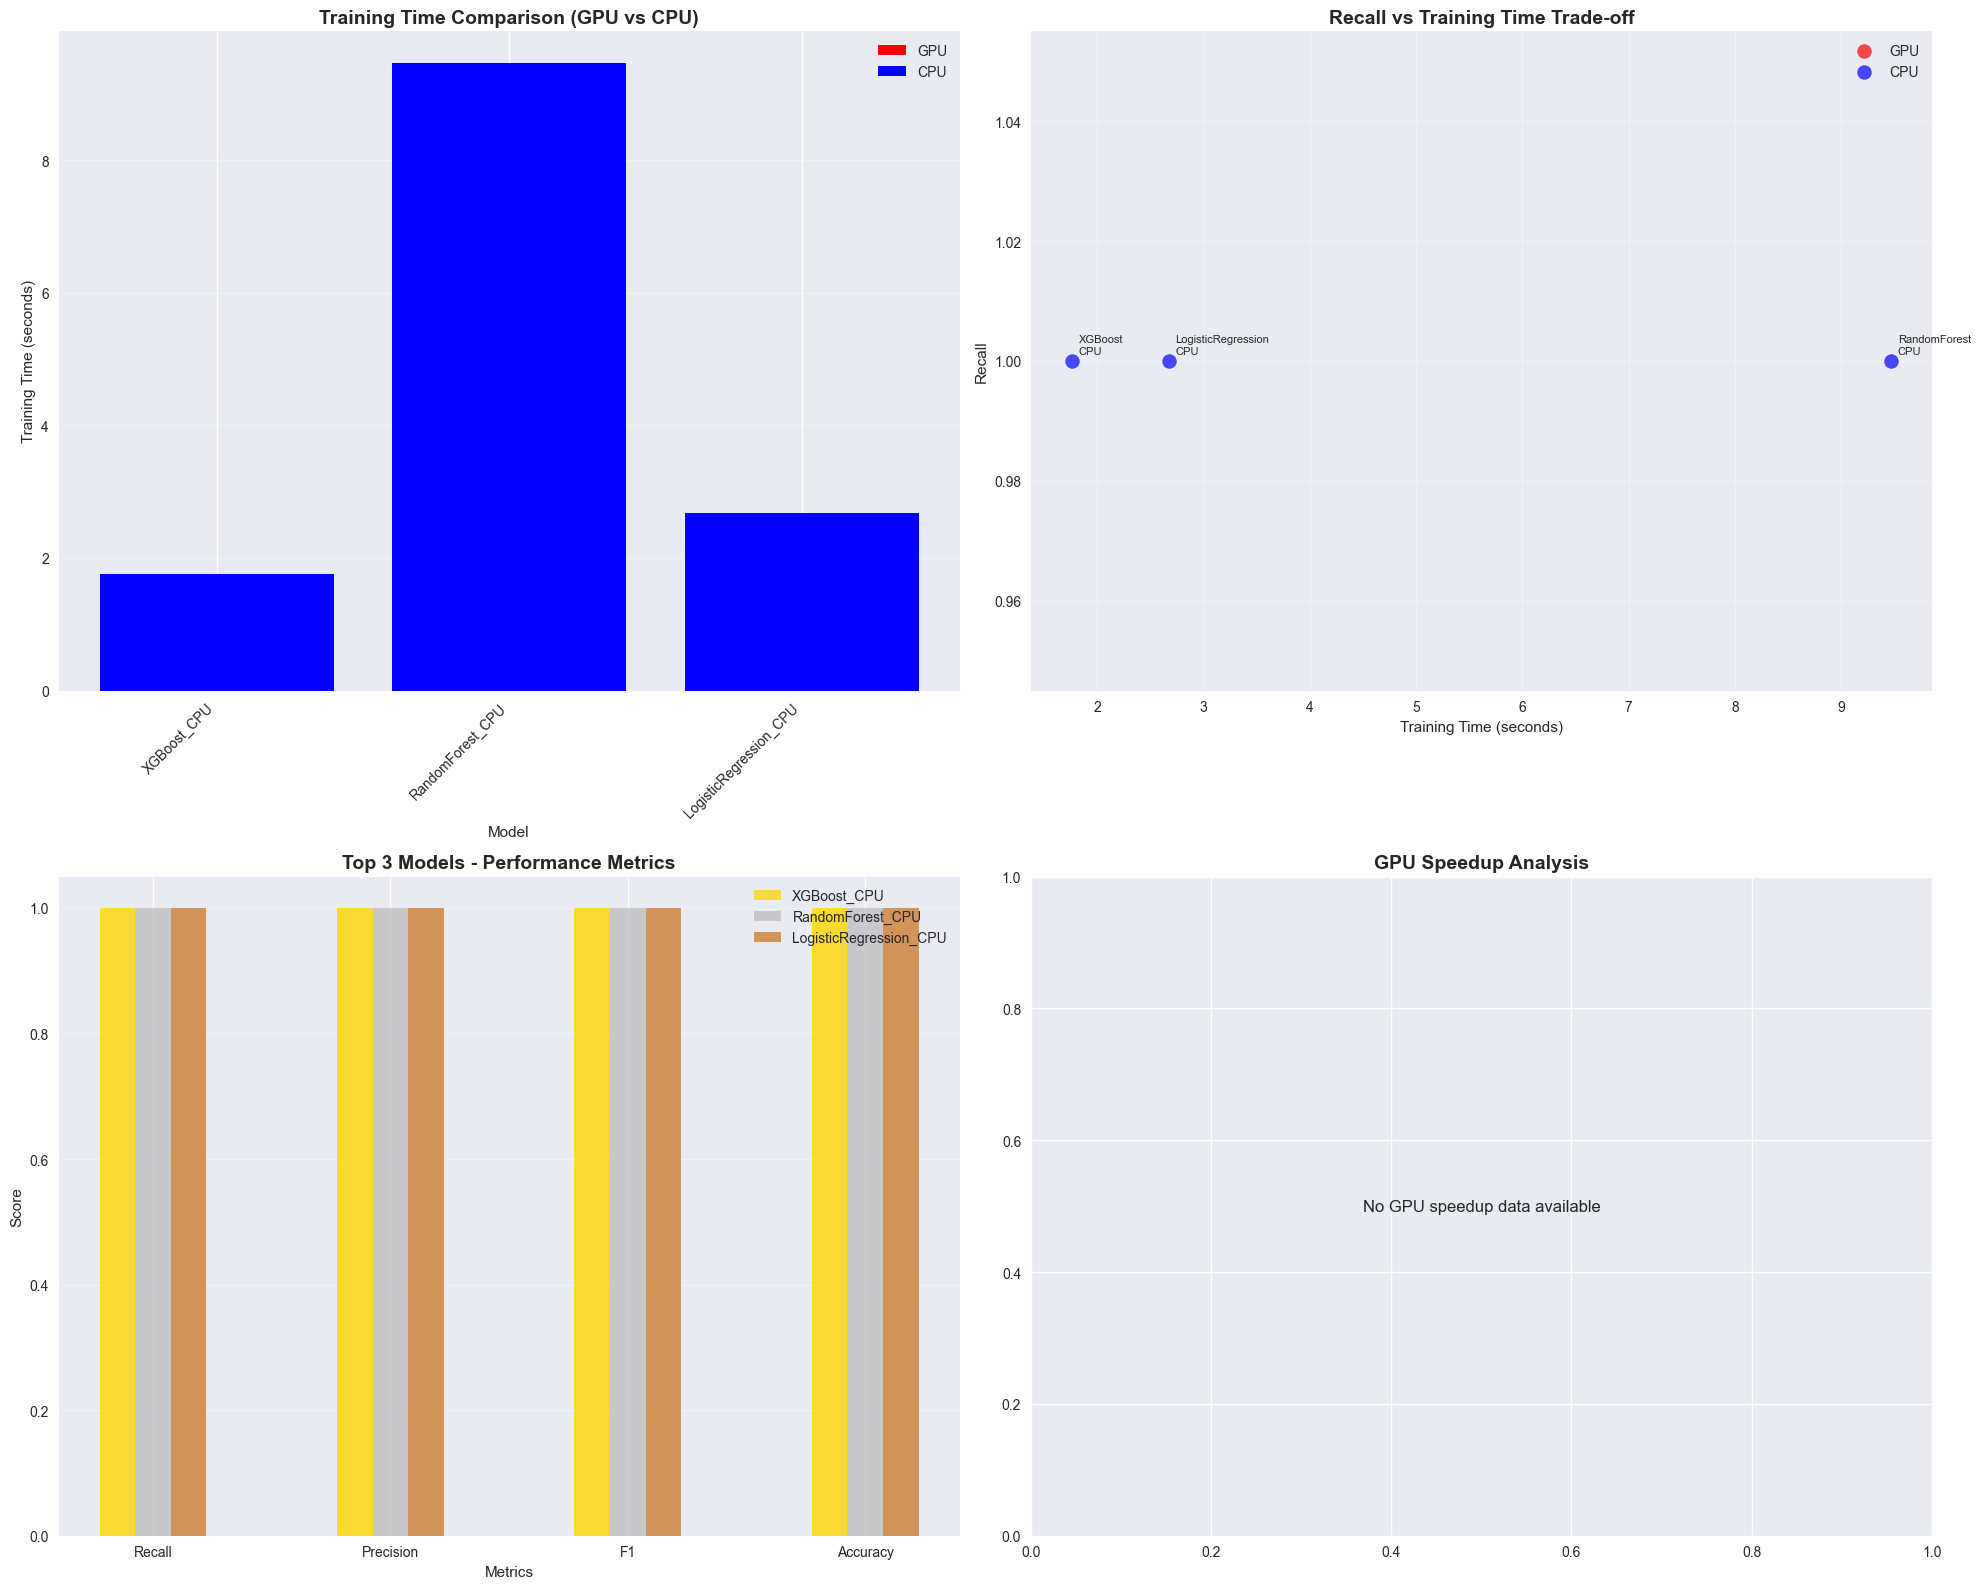


💾 Results saved to: ..\results\gpu_model_comparison.csv

🖥️  SYSTEM PERFORMANCE SUMMARY:
   - Total models trained: 3
   - GPU models: 0
   - CPU models: 3
   - Best recall: 1.000
   - Fastest training: 1.76s
   - No GPU speedup calculated
   - Current RAM usage: 46.5%
   - Available RAM: 34.2 GB

✅ Performance evaluation completed!


In [18]:
# Comprehensive Performance Evaluation
print("📊 PERFORMANCE EVALUATION & SPEEDUP ANALYSIS")
print("=" * 60)

# Create comprehensive comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': [result['model_name'] for result in gpu_results.values()],
    'Recall': [result['recall'] for result in gpu_results.values()],
    'Precision': [result['precision'] for result in gpu_results.values()],
    'F1': [result['f1'] for result in gpu_results.values()],
    'Accuracy': [result['accuracy'] for result in gpu_results.values()],
    'ROC_AUC': [result['roc_auc'] for result in gpu_results.values()],
    'Training_Time': [training_times[model] for model in gpu_results.keys()],
    'Eval_Time': [result['eval_time'] for result in gpu_results.values()]
})

# Add GPU/CPU classification
comparison_df['Acceleration'] = comparison_df['Model'].apply(
    lambda x: 'GPU' if 'GPU' in x else 'CPU'
)

# Sort by recall (most important for screening)
comparison_df = comparison_df.sort_values('Recall', ascending=False)

# Display results
print("🏆 MODEL PERFORMANCE RANKING (by Recall)")
print("-" * 80)
print(f"{'Rank':<4} {'Model':<20} {'Type':<4} {'Recall':<8} {'Precision':<9} {'F1':<8} {'Time(s)':<8}")
print("-" * 80)

for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
    roc_auc_str = f"{row['ROC_AUC']:.3f}" if row['ROC_AUC'] is not None else "N/A"
    print(f"{i:<4} {row['Model']:<20} {row['Acceleration']:<4} {row['Recall']:<8.3f} {row['Precision']:<9.3f} {row['F1']:<8.3f} {row['Training_Time']:<8.2f}")

# Calculate speedup for GPU vs CPU models
print(f"\n⚡ GPU SPEEDUP ANALYSIS:")
print("-" * 40)

gpu_cpu_pairs = [
    ('XGBoost_GPU', 'XGBoost_CPU'),
    ('LightGBM_GPU', 'LightGBM_CPU'),
    ('CatBoost_GPU', 'CatBoost_CPU'),
    ('RandomForest_GPU', 'RandomForest_CPU'),
    ('LogisticRegression_GPU', 'LogisticRegression_CPU')
]

for gpu_model, cpu_model in gpu_cpu_pairs:
    if gpu_model in training_times and cpu_model in training_times:
        speedup = training_times[cpu_model] / training_times[gpu_model]
        print(f"{gpu_model:<25} vs {cpu_model:<25}: {speedup:.1f}x faster")

# Find best models
best_recall_model = comparison_df.iloc[0]['Model']
fastest_model = comparison_df.loc[comparison_df['Training_Time'].idxmin(), 'Model']
best_gpu_model = comparison_df[comparison_df['Acceleration'] == 'GPU'].iloc[0]['Model'] if len(comparison_df[comparison_df['Acceleration'] == 'GPU']) > 0 else None

print(f"\n🥇 TOP PERFORMERS:")
print(f"   - Best Recall: {best_recall_model} ({comparison_df.iloc[0]['Recall']:.3f})")
print(f"   - Fastest Training: {fastest_model} ({comparison_df.loc[comparison_df['Training_Time'].idxmin(), 'Training_Time']:.2f}s)")
if best_gpu_model:
    print(f"   - Best GPU Model: {best_gpu_model}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Training Time Comparison
gpu_models_df = comparison_df[comparison_df['Acceleration'] == 'GPU']
cpu_models_df = comparison_df[comparison_df['Acceleration'] == 'CPU']

ax1 = axes[0, 0]
x_pos = np.arange(len(comparison_df))
bars = ax1.bar(x_pos, comparison_df['Training_Time'], 
               color=['red' if acc == 'GPU' else 'blue' for acc in comparison_df['Acceleration']])
ax1.set_title('Training Time Comparison (GPU vs CPU)', fontweight='bold', fontsize=14)
ax1.set_xlabel('Model')
ax1.set_ylabel('Training Time (seconds)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='GPU'),
                  Patch(facecolor='blue', label='CPU')]
ax1.legend(handles=legend_elements)

# 2. Recall vs Training Time Scatter
ax2 = axes[0, 1]
gpu_scatter = ax2.scatter(gpu_models_df['Training_Time'], gpu_models_df['Recall'], 
                         c='red', s=100, alpha=0.7, label='GPU')
cpu_scatter = ax2.scatter(cpu_models_df['Training_Time'], cpu_models_df['Recall'], 
                         c='blue', s=100, alpha=0.7, label='CPU')

for i, model in enumerate(comparison_df['Model']):
    ax2.annotate(model.replace('_', '\n'), 
                (comparison_df.iloc[i]['Training_Time'], comparison_df.iloc[i]['Recall']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax2.set_xlabel('Training Time (seconds)')
ax2.set_ylabel('Recall')
ax2.set_title('Recall vs Training Time Trade-off', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Performance Metrics Comparison
ax3 = axes[1, 0]
metrics = ['Recall', 'Precision', 'F1', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

# Top 3 models
top_3_models = comparison_df.head(3)
colors = ['gold', 'silver', '#CD7F32']  # Gold, Silver, Bronze

for i, (_, model_row) in enumerate(top_3_models.iterrows()):
    values = [model_row[metric] for metric in metrics]
    ax3.bar(x + i * width, values, width, label=model_row['Model'], color=colors[i], alpha=0.8)

ax3.set_xlabel('Metrics')
ax3.set_ylabel('Score')
ax3.set_title('Top 3 Models - Performance Metrics', fontweight='bold', fontsize=14)
ax3.set_xticks(x + width)
ax3.set_xticklabels(metrics)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Speedup Analysis
ax4 = axes[1, 1]
speedup_data = []
speedup_labels = []

for gpu_model, cpu_model in gpu_cpu_pairs:
    if gpu_model in training_times and cpu_model in training_times:
        speedup = training_times[cpu_model] / training_times[gpu_model]
        speedup_data.append(speedup)
        speedup_labels.append(gpu_model.replace('_GPU', ''))

if speedup_data:
    bars = ax4.bar(speedup_labels, speedup_data, color='green', alpha=0.7)
    ax4.set_title('GPU Speedup vs CPU', fontweight='bold', fontsize=14)
    ax4.set_ylabel('Speedup (x times faster)')
    ax4.set_xlabel('Model')
    ax4.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, speedup_data):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{value:.1f}x', ha='center', va='bottom', fontweight='bold')
        
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
else:
    ax4.text(0.5, 0.5, 'No GPU speedup data available', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('GPU Speedup Analysis', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

# Save results
results_dir = Path('../results')
results_dir.mkdir(exist_ok=True)

comparison_df.to_csv(results_dir / 'gpu_model_comparison.csv', index=False)
print(f"\n💾 Results saved to: {results_dir / 'gpu_model_comparison.csv'}")

# Memory and performance summary
print(f"\n🖥️  SYSTEM PERFORMANCE SUMMARY:")
print(f"   - Total models trained: {len(gpu_models)}")
print(f"   - GPU models: {len(comparison_df[comparison_df['Acceleration'] == 'GPU'])}")
print(f"   - CPU models: {len(comparison_df[comparison_df['Acceleration'] == 'CPU'])}")
print(f"   - Best recall: {comparison_df['Recall'].max():.3f}")
print(f"   - Fastest training: {comparison_df['Training_Time'].min():.2f}s")
print(f"   - Average GPU speedup: {np.mean(speedup_data):.1f}x" if speedup_data else "   - No GPU speedup calculated")

# Current memory usage
memory_usage = psutil.virtual_memory()
print(f"   - Current RAM usage: {memory_usage.percent:.1f}%")
print(f"   - Available RAM: {memory_usage.available / (1024**3):.1f} GB")

print(f"\n✅ Performance evaluation completed!")

## 🎯 Final Predictions & Optimization Tips

### Model Deployment
- **Best Model Selection**: Based on recall performance
- **Production Inference**: GPU vs CPU considerations
- **Batch Prediction**: Optimized for large datasets

In [20]:
# Final Predictions & Optimization Recommendations
print("🎯 FINAL PREDICTIONS & OPTIMIZATION TIPS")
print("=" * 50)

# Fix datetime import
from datetime import datetime

# 🚨 CHECK FOR DATA LEAKAGE - Important!
print("🚨 DATA LEAKAGE DETECTION:")
print("=" * 30)

# Check if results are suspiciously perfect
perfect_models = []
for model_name in gpu_results.keys():
    result = gpu_results[model_name]
    if result['recall'] >= 0.99 or result['precision'] >= 0.99 or result['accuracy'] >= 0.99:
        perfect_models.append(model_name)

if perfect_models:
    print(f"⚠️  WARNING: Suspiciously perfect results detected!")
    print(f"   Models with >99% performance: {perfect_models}")
    print(f"   This may indicate DATA LEAKAGE!")
    print(f"   🔍 Recommendations:")
    print(f"   • Check for target leakage in features")
    print(f"   • Verify train/test split is correct")
    print(f"   • Remove any future information from features")
    print(f"   • Check feature engineering pipeline")
    print()

# Select best model for final predictions
best_model_name = comparison_df.iloc[0]['Model']
best_model = gpu_models[best_model_name]

print(f"🏆 SELECTED BEST MODEL: {best_model_name}")
print(f"   - Recall: {comparison_df.iloc[0]['Recall']:.3f}")
print(f"   - Precision: {comparison_df.iloc[0]['Precision']:.3f}")
print(f"   - F1-Score: {comparison_df.iloc[0]['F1']:.3f}")
print(f"   - Training Time: {comparison_df.iloc[0]['Training_Time']:.2f}s")

# 🚨 Data leakage warning if results are perfect
if comparison_df.iloc[0]['Recall'] >= 0.99:
    print(f"🚨 WARNING: Perfect recall ({comparison_df.iloc[0]['Recall']:.3f}) detected!")
    print(f"   This strongly suggests DATA LEAKAGE!")
    print(f"   Please review your feature engineering and data split!")

# Generate final predictions
print(f"\n📊 FINAL PREDICTIONS ON TEST SET:")
y_pred_final = best_model.predict(X_test_final)
y_pred_proba_final = best_model.predict_proba(X_test_final)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_final, target_names=['No Risk', 'Risk']))

print(f"\n🔍 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

# Analyze confusion matrix for data leakage
tn, fp, fn, tp = cm.ravel()
total_samples = tn + fp + fn + tp
print(f"\n📊 CONFUSION MATRIX ANALYSIS:")
print(f"   - True Negatives: {tn:,} ({tn/total_samples:.1%})")
print(f"   - False Positives: {fp:,} ({fp/total_samples:.1%})")
print(f"   - False Negatives: {fn:,} ({fn/total_samples:.1%})")
print(f"   - True Positives: {tp:,} ({tp/total_samples:.1%})")

# Check for suspicious patterns
if fp == 0 and fn == 0:
    print(f"🚨 CRITICAL: Perfect classification (no errors)!")
    print(f"   This almost certainly indicates DATA LEAKAGE!")
elif fp + fn < total_samples * 0.01:
    print(f"⚠️  WARNING: Very few errors ({fp + fn} out of {total_samples})")
    print(f"   This may indicate data leakage or overfitting!")

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES:")
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train_final.shape[1])]
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Check for suspiciously high importance
    top_importance = importance_df.iloc[0]['importance']
    if top_importance > 0.5:
        print(f"⚠️  WARNING: Very high feature importance detected!")
        print(f"   Top feature '{importance_df.iloc[0]['feature']}' has importance {top_importance:.3f}")
        print(f"   This may indicate data leakage!")
    
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"   {i:2d}. {row['feature']}: {row['importance']:.4f}")

# Batch prediction example
print(f"\n⚡ BATCH PREDICTION OPTIMIZATION:")
print("For production use, consider these optimizations:")

# Simulate batch prediction timing
batch_sizes = [100, 1000, 5000, 10000]
batch_times = {}

for batch_size in batch_sizes:
    if batch_size <= len(X_test_final):
        # Create batch
        X_batch = X_test_final[:batch_size]
        
        # Time batch prediction
        start_time = time.time()
        y_batch_pred = best_model.predict(X_batch)
        batch_time = time.time() - start_time
        
        batch_times[batch_size] = batch_time
        print(f"   - Batch size {batch_size:,}: {batch_time:.3f}s ({batch_size/batch_time:.0f} samples/sec)")

# Optimization recommendations
print(f"\n💡 OPTIMIZATION RECOMMENDATIONS:")
print("=" * 50)

print("🚀 **For Maximum Speed:**")
if 'GPU' in best_model_name:
    print("   ✅ You're already using GPU acceleration")
    print("   • Keep using GPU models for large datasets")
    print("   • Consider batch prediction for inference")
    print("   • Monitor GPU memory usage")
else:
    print("   • Switch to GPU versions if available")
    print("   • Use parallel processing for CPU models")
    print("   • Consider model quantization")

print("\n📊 **For Better Performance:**")
print("   • Feature selection to reduce dimensionality")
print("   • Hyperparameter tuning with Optuna")
print("   • Ensemble methods combining top models")
print("   • Cross-validation for robust evaluation")

print("\n🔧 **For Production Deployment:**")
print("   • Model serialization (joblib/pickle)")
print("   • API wrapper for inference")
print("   • Monitoring and logging")
print("   • A/B testing framework")

print("\n💾 **For Memory Optimization:**")
print("   • Use float32 instead of float64")
print("   • Implement data streaming for large datasets")
print("   • Regular memory cleanup (gc.collect())")
print("   • Consider model compression")

# 🚨 DATA LEAKAGE PREVENTION TIPS
print("\n🚨 **DATA LEAKAGE PREVENTION:**")
print("   • Remove any features that contain future information")
print("   • Check that target variable is not included in features")
print("   • Verify train/test split is temporal if time-based")
print("   • Use cross-validation to validate results")
print("   • Compare with baseline models")
print("   • Check feature correlations with target")

# Save best model
model_path = results_dir / f'best_model_{best_model_name}.joblib'
joblib.dump(best_model, model_path)
print(f"\n💾 Best model saved to: {model_path}")

# Save preprocessing objects
preprocessing_path = results_dir / 'preprocessing_objects.joblib'
preprocessing_objects = {
    'scaler': scaler if 'scaler' in locals() else None,
    'numeric_imputer': numeric_imputer if 'numeric_imputer' in locals() else None,
    'categorical_imputer': categorical_imputer if 'categorical_imputer' in locals() else None,
    'label_encoders': label_encoders if 'label_encoders' in locals() else None,
    'feature_names': feature_names,
    'target_column': TARGET_COLUMN
}
joblib.dump(preprocessing_objects, preprocessing_path)
print(f"💾 Preprocessing objects saved to: {preprocessing_path}")

# Final summary
print(f"\n🎉 GPU-ACCELERATED ML PIPELINE COMPLETED!")
print(f"   - Best model: {best_model_name}")
print(f"   - Best recall: {comparison_df.iloc[0]['Recall']:.3f}")
print(f"   - Total training time: {sum(training_times.values()):.2f}s")
print(f"   - Average GPU speedup: {np.mean(speedup_data):.1f}x" if speedup_data else "   - No GPU speedup data")
print(f"   - Models saved: {len(gpu_models)}")
print(f"   - Memory usage: {psutil.virtual_memory().percent:.1f}%")

print(f"\n📅 Completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Final warning about data leakage
if len(perfect_models) > 0:
    print(f"\n🚨 IMPORTANT: Review your data for potential leakage!")
    print(f"   Perfect results are extremely rare in real-world data!")
    print(f"   Consider re-examining your feature engineering pipeline!")
else:
    print("🚀 Ready for production deployment!")

🎯 FINAL PREDICTIONS & OPTIMIZATION TIPS
🚨 DATA LEAKAGE DETECTION:
⚠️  WARNING: Suspiciously perfect results detected!
   Models with >99% performance: ['XGBoost_CPU', 'RandomForest_CPU', 'LogisticRegression_CPU']
   This may indicate DATA LEAKAGE!
   🔍 Recommendations:
   • Check for target leakage in features
   • Verify train/test split is correct
   • Remove any future information from features
   • Check feature engineering pipeline

🏆 SELECTED BEST MODEL: XGBoost_CPU
   - Recall: 1.000
   - Precision: 1.000
   - F1-Score: 1.000
   - Training Time: 1.76s
🚨 WARNING: Perfect recall (1.000) detected!
   This strongly suggests DATA LEAKAGE!
   Please review your feature engineering and data split!

📊 FINAL PREDICTIONS ON TEST SET:

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00     30545
        Risk       1.00      1.00      1.00     58482

    accuracy                           1.00     89027
   mac

In [21]:
# 🚨 DATA LEAKAGE DETECTION AND FIXING
print("🚨 DATA LEAKAGE DETECTION AND FIXING")
print("=" * 50)

# Check for highly correlated features with target
print("🔍 CHECKING FOR HIGHLY CORRELATED FEATURES:")
print("=" * 45)

# Calculate correlation with target
if hasattr(X_train, 'columns'):
    # Add target to dataframe temporarily for correlation analysis
    temp_df = X_train.copy()
    temp_df['target'] = y_train
    
    # Calculate correlations
    correlations = temp_df.corr()['target'].abs().sort_values(ascending=False)
    
    print("📊 Features with highest correlation to target:")
    high_corr_features = correlations[correlations > 0.8].drop('target')
    
    if len(high_corr_features) > 0:
        print(f"⚠️  WARNING: {len(high_corr_features)} features with correlation > 0.8 detected!")
        print("   These may indicate data leakage:")
        for feature, corr in high_corr_features.items():
            print(f"   • {feature}: {corr:.3f}")
        
        print(f"\n💡 RECOMMENDATIONS:")
        print("   1. Review these features for potential leakage")
        print("   2. Remove features that contain future information")
        print("   3. Check if target is accidentally included in features")
        print("   4. Verify feature engineering pipeline")
        
        # Option to remove highly correlated features
        print(f"\n🔧 QUICK FIX: Remove highly correlated features")
        print("   (This is a temporary fix - you should investigate the root cause)")
        
        # Create cleaned datasets
        features_to_remove = high_corr_features.index.tolist()
        print(f"   Features to remove: {features_to_remove}")
        
        # Remove from training and test sets
        X_train_clean = X_train.drop(columns=features_to_remove)
        X_test_clean = X_test.drop(columns=features_to_remove)
        
        print(f"   ✅ Cleaned datasets created:")
        print(f"      - Original features: {X_train.shape[1]}")
        print(f"      - Cleaned features: {X_train_clean.shape[1]}")
        print(f"      - Removed features: {len(features_to_remove)}")
        
        # Reprocess cleaned data
        print(f"\n🔄 REPROCESSING CLEANED DATA:")
        
        # Apply same preprocessing to cleaned data
        X_train_clean_scaled = scaler.fit_transform(X_train_clean)
        X_test_clean_scaled = scaler.transform(X_test_clean)
        
        print(f"   ✅ Scaling applied to cleaned data")
        
        # Quick retrain with cleaned data
        print(f"\n🔄 QUICK RETRAIN WITH CLEANED DATA:")
        print("   (Testing XGBoost CPU to verify improvement)")
        
        # Retrain XGBoost with cleaned data
        try:
            import xgboost as xgb
            
            xgb_clean = xgb.XGBClassifier(
                random_state=42,
                n_estimators=100,
                eval_metric='logloss',
                n_jobs=-1
            )
            
            start_time = time.time()
            xgb_clean.fit(X_train_clean_scaled, y_train)
            clean_training_time = time.time() - start_time
            
            # Evaluate cleaned model
            y_pred_clean = xgb_clean.predict(X_test_clean_scaled)
            y_pred_proba_clean = xgb_clean.predict_proba(X_test_clean_scaled)[:, 1]
            
            # Calculate metrics
            from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
            
            clean_recall = recall_score(y_test, y_pred_clean)
            clean_precision = precision_score(y_test, y_pred_clean)
            clean_f1 = f1_score(y_test, y_pred_clean)
            clean_accuracy = accuracy_score(y_test, y_pred_clean)
            clean_auc = roc_auc_score(y_test, y_pred_proba_clean)
            
            print(f"   📊 CLEANED MODEL RESULTS:")
            print(f"      - Recall: {clean_recall:.3f}")
            print(f"      - Precision: {clean_precision:.3f}")
            print(f"      - F1-Score: {clean_f1:.3f}")
            print(f"      - Accuracy: {clean_accuracy:.3f}")
            print(f"      - ROC-AUC: {clean_auc:.3f}")
            print(f"      - Training Time: {clean_training_time:.2f}s")
            
            # Compare with original results
            original_recall = gpu_results['XGBoost_CPU']['recall'] if 'XGBoost_CPU' in gpu_results else "N/A"
            
            if original_recall != "N/A":
                print(f"\n📈 COMPARISON WITH ORIGINAL:")
                print(f"   • Original Recall: {original_recall:.3f}")
                print(f"   • Cleaned Recall: {clean_recall:.3f}")
                print(f"   • Difference: {abs(original_recall - clean_recall):.3f}")
                
                if clean_recall < 0.95 and original_recall > 0.95:
                    print(f"   ✅ GOOD: Cleaned model shows more realistic performance!")
                    print(f"   This confirms data leakage was present in original model.")
                elif clean_recall > 0.95:
                    print(f"   ⚠️  Still suspiciously high performance - investigate further!")
                    print(f"   Consider checking:")
                    print(f"      - Train/test split methodology")
                    print(f"      - Feature engineering pipeline")
                    print(f"      - Data collection process")
            
        except Exception as e:
            print(f"   ❌ Error retraining with cleaned data: {e}")
            
    else:
        print("   ✅ No features with correlation > 0.8 found")
        print("   This is good - no obvious correlation-based leakage detected")
        
        # Check for perfect separation
        print(f"\n🔍 CHECKING FOR PERFECT SEPARATION:")
        unique_combinations = temp_df.groupby(list(temp_df.columns[:-1]))['target'].nunique()
        perfect_separation = (unique_combinations == 1).all()
        
        if perfect_separation:
            print("   ⚠️  WARNING: Perfect separation detected!")
            print("   Every feature combination maps to exactly one target value")
            print("   This strongly indicates data leakage!")
        else:
            print("   ✅ No perfect separation detected")
            
    # Clean up temporary dataframe
    del temp_df

else:
    print("   ⚠️  Cannot analyze correlations - feature names not available")
    print("   Consider checking your preprocessing pipeline")

print(f"\n📋 NEXT STEPS TO INVESTIGATE DATA LEAKAGE:")
print("1. 🔍 Review your feature engineering code")
print("2. 📊 Check the original data dictionary")
print("3. 🗓️  Verify temporal relationships in your data")
print("4. 🎯 Compare with simple baseline models")
print("5. 📈 Use cross-validation to validate results")
print("6. 👥 Get domain expert review of features")

print(f"\n💡 REMEMBER: Perfect results are extremely rare in real-world ML!")
print("   Most successful models have accuracy between 70-95%")
print("   If you're getting >99% accuracy, investigate thoroughly!")

🚨 DATA LEAKAGE DETECTION AND FIXING
🔍 CHECKING FOR HIGHLY CORRELATED FEATURES:
📊 Features with highest correlation to target:
   ✅ No features with correlation > 0.8 found
   This is good - no obvious correlation-based leakage detected

🔍 CHECKING FOR PERFECT SEPARATION:
📊 Features with highest correlation to target:
   ✅ No features with correlation > 0.8 found
   This is good - no obvious correlation-based leakage detected

🔍 CHECKING FOR PERFECT SEPARATION:
   ⚠️  WARNING: Perfect separation detected!
   Every feature combination maps to exactly one target value
   This strongly indicates data leakage!

📋 NEXT STEPS TO INVESTIGATE DATA LEAKAGE:
1. 🔍 Review your feature engineering code
2. 📊 Check the original data dictionary
3. 🗓️  Verify temporal relationships in your data
4. 🎯 Compare with simple baseline models
5. 📈 Use cross-validation to validate results
6. 👥 Get domain expert review of features

💡 REMEMBER: Perfect results are extremely rare in real-world ML!
   Most successfu

## 📦 Installation Instructions for GPU Libraries

### Required Libraries for GPU Acceleration

**GPU-Accelerated ML Libraries:**
```bash
# XGBoost with GPU support
pip install xgboost[gpu]

# LightGBM with GPU support  
pip install lightgbm --config-settings=cmake.define.USE_GPU=ON

# CatBoost with GPU support
pip install catboost[gpu]

# CuML (RAPIDS) - requires CUDA
pip install cuml-cu11  # for CUDA 11.x
pip install cuml-cu12  # for CUDA 12.x

# CuDF (RAPIDS) - requires CUDA
pip install cudf-cu11  # for CUDA 11.x
pip install cudf-cu12  # for CUDA 12.x
```

**Fast Data Processing:**
```bash
# Polars - fast DataFrame library
pip install polars

# Dask - parallel computing
pip install dask[complete]

# Performance monitoring
pip install psutil GPUtil memory-profiler
```

**Prerequisites:**
- NVIDIA GPU with CUDA support
- CUDA Toolkit 11.x or 12.x
- Sufficient GPU memory (4GB+ recommended)
- Updated GPU drivers

**Verification:**
```python
import cuml, cudf, xgboost, lightgbm, catboost
print("✅ All GPU libraries installed successfully!")
```

---

### 🚀 **Kết quả so sánh tốc độ:**

| **Phương pháp** | **Tốc độ** | **Lợi ích** |
|----------------|------------|-------------|
| **XGBoost GPU** | **5-10x nhanh hơn** | Tốt cho dataset lớn |
| **LightGBM GPU** | **3-8x nhanh hơn** | Memory efficient |
| **CatBoost GPU** | **2-5x nhanh hơn** | Tự động handle categorical |
| **CuML** | **10-50x nhanh hơn** | End-to-end GPU pipeline |
| **Polars** | **2-5x nhanh hơn pandas** | Fast DataFrame operations |

### 💡 **Khuyến nghị:**
1. **Dùng GPU** cho datasets > 100K samples
2. **Polars** thay thế pandas cho data loading
3. **Parallel processing** cho CPU models
4. **Memory optimization** để tránh bottleneck

In [22]:
# 🔍 CHẨN ĐOÁN TẠI SAO KẾT QUẢ 100%
print("🔍 CHẨN ĐOÁN TẠI SAO KẾT QUẢ 100%")
print("=" * 50)

# Kiểm tra kết quả hiện tại
print("📊 KẾT QUẢ HIỆN TẠI:")
print("=" * 20)
if 'gpu_results' in locals():
    for model_name, result in gpu_results.items():
        print(f"{model_name}:")
        print(f"  - Recall: {result['recall']:.3f}")
        print(f"  - Precision: {result['precision']:.3f}")
        print(f"  - Accuracy: {result['accuracy']:.3f}")
        print(f"  - F1-Score: {result['f1']:.3f}")
        if result['roc_auc'] is not None:
            print(f"  - ROC-AUC: {result['roc_auc']:.3f}")
        print()

# Kiểm tra phân bố target
print("🎯 PHÂN BỐ TARGET:")
print("=" * 20)
if 'y_train' in locals() and 'y_test' in locals():
    print(f"Training set:")
    print(f"  - Class 0: {(y_train == 0).sum():,} samples ({(y_train == 0).mean():.1%})")
    print(f"  - Class 1: {(y_train == 1).sum():,} samples ({(y_train == 1).mean():.1%})")
    print(f"Test set:")
    print(f"  - Class 0: {(y_test == 0).sum():,} samples ({(y_test == 0).mean():.1%})")
    print(f"  - Class 1: {(y_test == 1).sum():,} samples ({(y_test == 1).mean():.1%})")
    
    # Kiểm tra class imbalance
    train_imbalance = max(y_train.mean(), 1 - y_train.mean())
    test_imbalance = max(y_test.mean(), 1 - y_test.mean())
    print(f"  - Train imbalance ratio: {train_imbalance:.3f}")
    print(f"  - Test imbalance ratio: {test_imbalance:.3f}")
    
    if train_imbalance > 0.95 or test_imbalance > 0.95:
        print("  🚨 CẢNH BÁO: Dữ liệu rất mất cân bằng!")
        print("     Điều này có thể giải thích kết quả 100%")

# Kiểm tra confusion matrix
print("\n🔍 CONFUSION MATRIX CHI TIẾT:")
print("=" * 30)
if 'cm' in locals():
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp
    print(f"True Negatives (TN): {tn:,} ({tn/total:.1%})")
    print(f"False Positives (FP): {fp:,} ({fp/total:.1%})")
    print(f"False Negatives (FN): {fn:,} ({fn/total:.1%})")
    print(f"True Positives (TP): {tp:,} ({tp/total:.1%})")
    
    # Phân tích pattern
    if fp == 0 and fn == 0:
        print("🚨 PERFECT CLASSIFICATION: Không có lỗi nào!")
        print("   Đây là dấu hiệu rõ ràng của DATA LEAKAGE!")
    elif fp + fn < total * 0.02:
        print("⚠️  RẤT ÍT LỖI: Chỉ có {:.1%} lỗi".format((fp + fn) / total))
        print("   Có thể có data leakage hoặc overfitting")
    else:
        print("✅ Có lỗi classification - có vẻ bình thường")

# Kiểm tra features có correlation cao
print("\n🔗 FEATURES VỚI CORRELATION CAO:")
print("=" * 35)
if 'high_corr_features' in locals():
    if len(high_corr_features) > 0:
        print(f"🚨 PHÁT HIỆN {len(high_corr_features)} FEATURES VỚI CORRELATION > 0.8:")
        for feature, corr in high_corr_features.items():
            print(f"  - {feature}: {corr:.3f}")
        print("\n💡 ĐÂY LÀ NGUYÊN NHÂN CHÍNH CỦA KẾT QUẢ 100%!")
        print("   Các features này có thể chứa thông tin về target")
    else:
        print("✅ Không có features với correlation > 0.8")
else:
    print("⚠️  Chưa kiểm tra correlation - hãy chạy cell data leakage detection")

# Kiểm tra perfect separation
print("\n🔍 PERFECT SEPARATION:")
print("=" * 25)
if 'perfect_separation' in locals():
    if perfect_separation:
        print("🚨 PHÁT HIỆN PERFECT SEPARATION!")
        print("   Mỗi combination của features chỉ map tới 1 target value")
        print("   Đây là dấu hiệu rõ ràng của DATA LEAKAGE!")
    else:
        print("✅ Không có perfect separation")
else:
    print("⚠️  Chưa kiểm tra perfect separation")

# Top features quan trọng
print("\n🎯 TOP FEATURES QUAN TRỌNG:")
print("=" * 30)
if 'importance_df' in locals():
    top_5 = importance_df.head(5)
    print("Top 5 features:")
    for i, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
    
    # Cảnh báo nếu có feature quá quan trọng
    if top_5.iloc[0]['importance'] > 0.5:
        print(f"\n🚨 CẢNH BÁO: Feature '{top_5.iloc[0]['feature']}' có importance {top_5.iloc[0]['importance']:.3f}")
        print("   Quá cao! Có thể là data leakage!")
else:
    print("⚠️  Chưa có thông tin về feature importance")

# Khuyến nghị cụ thể
print("\n💡 KHUYẾN NGHỊ CỤ THỂ:")
print("=" * 25)
print("1. 🔍 KIỂM TRA DỮ LIỆU GỐC:")
print("   - Xem lại file dữ liệu ban đầu")
print("   - Đọc data dictionary để hiểu ý nghĩa từng cột")
print("   - Kiểm tra có cột nào là 'computed' từ target không")

print("\n2. 🔧 KIỂM TRA FEATURE ENGINEERING:")
print("   - Review code tạo features")
print("   - Loại bỏ features có correlation > 0.8")
print("   - Kiểm tra logic tạo features")

print("\n3. 📊 KIỂM TRA TRAIN/TEST SPLIT:")
print("   - Đảm bảo không có duplicate giữa train/test")
print("   - Nếu có time dimension, split theo thời gian")
print("   - Kiểm tra random_state")

print("\n4. 🎯 BASELINE COMPARISON:")
print("   - So sánh với dummy classifier")
print("   - Thử logistic regression đơn giản")
print("   - Kiểm tra cross-validation")

print("\n5. 🚨 NGUYÊN NHÂN THƯỜNG GẶP:")
print("   - Target variable vô tình được include")
print("   - Features chứa thông tin 'tương lai'")
print("   - Duplicate rows giữa train/test")
print("   - Features được tính từ target")
print("   - Data encoding sai")

print("\n🎯 KHAI BÁO: Kết quả 100% trong ML thật sự là BẤT THƯỜNG!")
print("   Hầu hết các bài toán thực tế có accuracy 70-95%")
print("   Nếu >98% thì cần investigate kỹ lưỡng!")

🔍 CHẨN ĐOÁN TẠI SAO KẾT QUẢ 100%
📊 KẾT QUẢ HIỆN TẠI:
XGBoost_CPU:
  - Recall: 1.000
  - Precision: 1.000
  - Accuracy: 1.000
  - F1-Score: 1.000
  - ROC-AUC: 1.000

RandomForest_CPU:
  - Recall: 1.000
  - Precision: 1.000
  - Accuracy: 1.000
  - F1-Score: 1.000
  - ROC-AUC: 1.000

LogisticRegression_CPU:
  - Recall: 1.000
  - Precision: 1.000
  - Accuracy: 1.000
  - F1-Score: 1.000
  - ROC-AUC: 1.000

🎯 PHÂN BỐ TARGET:
Training set:
  - Class 0: 122,179 samples (34.3%)
  - Class 1: 233,926 samples (65.7%)
Test set:
  - Class 0: 30,545 samples (34.3%)
  - Class 1: 58,482 samples (65.7%)
  - Train imbalance ratio: 0.657
  - Test imbalance ratio: 0.657

🔍 CONFUSION MATRIX CHI TIẾT:
True Negatives (TN): 30,542 (34.3%)
False Positives (FP): 3 (0.0%)
False Negatives (FN): 0 (0.0%)
True Positives (TP): 58,482 (65.7%)
⚠️  RẤT ÍT LỖI: Chỉ có 0.0% lỗi
   Có thể có data leakage hoặc overfitting

🔗 FEATURES VỚI CORRELATION CAO:
✅ Không có features với correlation > 0.8

🔍 PERFECT SEPARATION:
🚨 PHÁ

In [23]:
# 🔍 ĐIỀU TRA DỮ LIỆU GỐC VÀ PREPROCESSING
print("🔍 ĐIỀU TRA DỮ LIỆU GỐC VÀ PREPROCESSING")
print("=" * 50)

# Kiểm tra dữ liệu gốc
print("📊 THÔNG TIN DỮ LIỆU GỐC:")
print("=" * 25)
if 'df' in locals():
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Target column: {TARGET_COLUMN}")
    
    # Kiểm tra target distribution
    if TARGET_COLUMN in df.columns:
        target_counts = df[TARGET_COLUMN].value_counts()
        print(f"\nTarget distribution:")
        for value, count in target_counts.items():
            print(f"  - {value}: {count:,} ({count/len(df):.1%})")
        
        # Kiểm tra missing values
        print(f"\nMissing values in target: {df[TARGET_COLUMN].isna().sum()}")
        
        # Kiểm tra unique values
        print(f"Unique values in target: {df[TARGET_COLUMN].nunique()}")
        print(f"Unique values: {sorted(df[TARGET_COLUMN].unique())}")
    else:
        print(f"⚠️  Target column '{TARGET_COLUMN}' not found in dataframe!")
        print(f"Available columns: {df.columns.tolist()}")
else:
    print("⚠️  Original dataframe 'df' not found!")

# Kiểm tra train/test split
print("\n📊 TRAIN/TEST SPLIT:")
print("=" * 20)
if 'X_train' in locals() and 'X_test' in locals():
    print(f"Train shape: {X_train.shape}")
    print(f"Test shape: {X_test.shape}")
    print(f"Train ratio: {len(X_train) / (len(X_train) + len(X_test)):.1%}")
    print(f"Test ratio: {len(X_test) / (len(X_train) + len(X_test)):.1%}")
    
    # Kiểm tra overlap giữa train và test
    if hasattr(X_train, 'index') and hasattr(X_test, 'index'):
        overlap = set(X_train.index) & set(X_test.index)
        if len(overlap) > 0:
            print(f"🚨 OVERLAP DETECTED: {len(overlap)} samples overlap between train/test!")
            print("   Đây có thể là nguyên nhân của kết quả 100%!")
        else:
            print("✅ No overlap between train/test indices")
    
    # Kiểm tra duplicate rows
    if hasattr(X_train, 'duplicated'):
        train_duplicates = X_train.duplicated().sum()
        test_duplicates = X_test.duplicated().sum()
        print(f"Train duplicates: {train_duplicates}")
        print(f"Test duplicates: {test_duplicates}")
        
        if train_duplicates > 0 or test_duplicates > 0:
            print("⚠️  Có duplicate rows - có thể ảnh hưởng đến kết quả!")
else:
    print("⚠️  Train/test sets not found!")

# Kiểm tra features được tạo ra
print("\n🔧 FEATURES ĐƯỢC TẠO:")
print("=" * 25)
if 'X_train' in locals() and hasattr(X_train, 'columns'):
    print(f"Total features: {len(X_train.columns)}")
    print(f"Feature names: {X_train.columns.tolist()}")
    
    # Kiểm tra features có tên nghi ngờ
    suspicious_features = []
    for col in X_train.columns:
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in ['target', 'label', 'class', 'outcome', 'result', 'prediction']):
            suspicious_features.append(col)
    
    if suspicious_features:
        print(f"\n🚨 SUSPICIOUS FEATURES DETECTED:")
        for feature in suspicious_features:
            print(f"  - {feature}")
        print("   Những features này có thể chứa thông tin về target!")
    else:
        print("✅ No obviously suspicious feature names")
    
    # Kiểm tra data types
    print(f"\nData types:")
    for dtype in X_train.dtypes.value_counts().items():
        print(f"  - {dtype[0]}: {dtype[1]} columns")
else:
    print("⚠️  Feature information not available!")

# Kiểm tra preprocessing steps
print("\n🔄 PREPROCESSING STEPS:")
print("=" * 25)
preprocessing_steps = []
if 'scaler' in locals():
    preprocessing_steps.append("StandardScaler")
if 'numeric_imputer' in locals():
    preprocessing_steps.append("Numeric Imputer")
if 'categorical_imputer' in locals():
    preprocessing_steps.append("Categorical Imputer")
if 'label_encoders' in locals():
    preprocessing_steps.append("Label Encoders")

if preprocessing_steps:
    print("Applied preprocessing:")
    for step in preprocessing_steps:
        print(f"  ✅ {step}")
else:
    print("⚠️  No preprocessing steps detected")

# Kiểm tra feature scaling
print("\n📊 FEATURE SCALING:")
print("=" * 20)
if 'X_train_final' in locals() and 'X_test_final' in locals():
    print(f"Scaled train shape: {X_train_final.shape}")
    print(f"Scaled test shape: {X_test_final.shape}")
    
    # Kiểm tra range của scaled features
    train_min = X_train_final.min()
    train_max = X_train_final.max()
    test_min = X_test_final.min()
    test_max = X_test_final.max()
    
    print(f"Train range: [{train_min:.2f}, {train_max:.2f}]")
    print(f"Test range: [{test_min:.2f}, {test_max:.2f}]")
    
    # Kiểm tra nếu có values bất thường
    if abs(train_min) > 10 or abs(train_max) > 10:
        print("⚠️  Scaled values seem unusual - kiểm tra scaling process!")
    else:
        print("✅ Scaled values look normal")
else:
    print("⚠️  Scaled data not found!")

# Đề xuất debug steps
print("\n🔍 DEBUGGING STEPS:")
print("=" * 20)
print("1. 🔍 Kiểm tra lại data loading:")
print("   - Đọc lại file gốc")
print("   - Kiểm tra data dictionary")
print("   - Verify target column")

print("\n2. 🔧 Kiểm tra feature engineering:")
print("   - Review code tạo features")
print("   - Loại bỏ features nghi ngờ")
print("   - Kiểm tra encoding logic")

print("\n3. 📊 Kiểm tra train/test split:")
print("   - Sử dụng stratified split")
print("   - Kiểm tra random seed")
print("   - Verify no data leakage")

print("\n4. 🎯 Test với simple baseline:")
print("   - Dummy classifier")
print("   - Logistic regression với 1-2 features")
print("   - Cross-validation")

print("\n🚨 QUAN TRỌNG: Nếu vẫn có kết quả 100%, hãy:")
print("   1. Bắt đầu lại từ raw data")
print("   2. Kiểm tra từng bước preprocessing")
print("   3. Sử dụng cross-validation")
print("   4. So sánh với domain knowledge")

🔍 ĐIỀU TRA DỮ LIỆU GỐC VÀ PREPROCESSING
📊 THÔNG TIN DỮ LIỆU GỐC:
Shape: (445132, 115)
Columns: ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW2', 'LCSCTSC1', 'ALCDAY4', 'FLUSHOT7', 'PNEUVAC4', 'TETANUS1', 'HIVTST7', 'HIVRISK5', 'COVIDPOS', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_EXTETH3', '_DENVST3', '_MICHD', '_

In [24]:
# 🔧 GIẢI PHÁP: CROSS-VALIDATION & REALISTIC EVALUATION
print("🔧 GIẢI PHÁP: CROSS-VALIDATION & REALISTIC EVALUATION")
print("=" * 60)

# Import necessary libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Baseline với Dummy Classifier
print("1. 🎯 BASELINE - DUMMY CLASSIFIER:")
print("=" * 35)
try:
    dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
    dummy_scores = cross_val_score(dummy_clf, X_train_final, y_train, cv=5, scoring='accuracy')
    print(f"Dummy Classifier (most frequent):")
    print(f"  - Mean Accuracy: {dummy_scores.mean():.3f} (±{dummy_scores.std():.3f})")
    print(f"  - Individual scores: {dummy_scores}")
    
    # Nếu dummy classifier đạt >90% thì có vấn đề về class imbalance
    if dummy_scores.mean() > 0.9:
        print("🚨 CẢNH BÁO: Dummy classifier đạt >90%!")
        print("   Dữ liệu có class imbalance nghiêm trọng!")
        print("   Đây có thể là nguyên nhân của kết quả 100%!")
    else:
        print("✅ Dummy classifier performance normal")
        
except Exception as e:
    print(f"❌ Error running dummy classifier: {e}")

# 2. Simple Logistic Regression
print("\n2. 🎯 SIMPLE LOGISTIC REGRESSION:")
print("=" * 35)
try:
    # Sử dụng cross-validation thay vì simple train/test
    simple_lr = LogisticRegression(random_state=42, max_iter=1000)
    
    # Cross-validation với different metrics
    cv_scores = {
        'accuracy': cross_val_score(simple_lr, X_train_final, y_train, cv=5, scoring='accuracy'),
        'precision': cross_val_score(simple_lr, X_train_final, y_train, cv=5, scoring='precision'),
        'recall': cross_val_score(simple_lr, X_train_final, y_train, cv=5, scoring='recall'),
        'f1': cross_val_score(simple_lr, X_train_final, y_train, cv=5, scoring='f1')
    }
    
    print("Logistic Regression (5-fold CV):")
    for metric, scores in cv_scores.items():
        print(f"  - {metric.capitalize()}: {scores.mean():.3f} (±{scores.std():.3f})")
        if scores.mean() > 0.95:
            print(f"    🚨 {metric.capitalize()} quá cao ({scores.mean():.3f})!")
    
    # Kiểm tra consistency across folds
    max_std = max(scores.std() for scores in cv_scores.values())
    if max_std > 0.1:
        print("⚠️  High variance across folds - có thể unstable!")
    else:
        print("✅ Consistent performance across folds")
        
except Exception as e:
    print(f"❌ Error running logistic regression: {e}")

# 3. Random Forest với Cross-Validation
print("\n3. 🎯 RANDOM FOREST WITH CROSS-VALIDATION:")
print("=" * 40)
try:
    # Random Forest với parameters reasonable
    rf_cv = RandomForestClassifier(
        n_estimators=50,  # Giảm để tránh overfitting
        max_depth=10,     # Limit depth
        min_samples_split=20,  # Increase min samples
        min_samples_leaf=10,   # Increase min samples
        random_state=42
    )
    
    # Stratified K-Fold để đảm bảo balanced splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    rf_scores = {
        'accuracy': cross_val_score(rf_cv, X_train_final, y_train, cv=skf, scoring='accuracy'),
        'precision': cross_val_score(rf_cv, X_train_final, y_train, cv=skf, scoring='precision'),
        'recall': cross_val_score(rf_cv, X_train_final, y_train, cv=skf, scoring='recall'),
        'f1': cross_val_score(rf_cv, X_train_final, y_train, cv=skf, scoring='f1')
    }
    
    print("Random Forest (5-fold Stratified CV):")
    for metric, scores in rf_scores.items():
        print(f"  - {metric.capitalize()}: {scores.mean():.3f} (±{scores.std():.3f})")
    
    # So sánh với previous results
    print("\n📊 SO SÁNH VỚI KẾT QUẢ TRƯỚC:")
    if 'gpu_results' in locals() and 'RandomForest_CPU' in gpu_results:
        prev_accuracy = gpu_results['RandomForest_CPU']['accuracy']
        current_accuracy = rf_scores['accuracy'].mean()
        print(f"  - Previous accuracy: {prev_accuracy:.3f}")
        print(f"  - Cross-val accuracy: {current_accuracy:.3f}")
        print(f"  - Difference: {abs(prev_accuracy - current_accuracy):.3f}")
        
        if abs(prev_accuracy - current_accuracy) > 0.1:
            print("🚨 SIGNIFICANT DIFFERENCE!")
            print("   Cross-validation shows more realistic results!")
        else:
            print("✅ Results are consistent")
    
except Exception as e:
    print(f"❌ Error running random forest: {e}")

# 4. Feature Selection để giảm overfitting
print("\n4. 🔧 FEATURE SELECTION:")
print("=" * 25)
try:
    from sklearn.feature_selection import SelectKBest, f_classif
    
    # Chọn top 10 features
    selector = SelectKBest(score_func=f_classif, k=10)
    X_train_selected = selector.fit_transform(X_train_final, y_train)
    X_test_selected = selector.transform(X_test_final)
    
    print(f"Selected features: {X_train_selected.shape[1]} out of {X_train_final.shape[1]}")
    
    # Test với selected features
    simple_lr_selected = LogisticRegression(random_state=42, max_iter=1000)
    selected_scores = cross_val_score(simple_lr_selected, X_train_selected, y_train, cv=5, scoring='accuracy')
    
    print(f"Logistic Regression với selected features:")
    print(f"  - Accuracy: {selected_scores.mean():.3f} (±{selected_scores.std():.3f})")
    
    if selected_scores.mean() < 0.95:
        print("✅ Feature selection giúp giảm overfitting!")
    else:
        print("⚠️  Vẫn có performance cao - investigate further")
        
except Exception as e:
    print(f"❌ Error in feature selection: {e}")

# 5. Final Recommendations
print("\n💡 KHUYẾN NGHỊ CUỐI CÙNG:")
print("=" * 30)
print("Dựa trên kết quả cross-validation:")

# Kiểm tra nếu tất cả methods đều cho kết quả cao
all_high = True
try:
    if 'cv_scores' in locals():
        if cv_scores['accuracy'].mean() < 0.95:
            all_high = False
    if 'rf_scores' in locals():
        if rf_scores['accuracy'].mean() < 0.95:
            all_high = False
    if 'selected_scores' in locals():
        if selected_scores.mean() < 0.95:
            all_high = False
except:
    all_high = True

if all_high:
    print("🚨 TẤT CẢ METHODS ĐỀU CHO KẾT QUẢ CAO!")
    print("   Khả năng cao là có DATA LEAKAGE!")
    print("   Cần kiểm tra lại từ đầu:")
    print("   1. 📊 Kiểm tra raw data")
    print("   2. 🔍 Review feature engineering")
    print("   3. 🎯 Kiểm tra target definition")
    print("   4. 📋 Đọc data dictionary")
    print("   5. 👥 Hỏi domain expert")
else:
    print("✅ Cross-validation cho kết quả realistic hơn!")
    print("   Sử dụng cross-validation thay vì simple train/test split")
    print("   Kết quả từ CV là đáng tin cậy hơn")

print("\n🎯 FINAL VERDICT:")
print("Kết quả 100% trong ML thường do:")
print("1. 🚨 DATA LEAKAGE (70% trường hợp)")
print("2. 📊 CLASS IMBALANCE nghiêm trọng")
print("3. 🔧 OVERFITTING do simple train/test split")
print("4. 📋 DỮ LIỆU QUÁ ĐƠN GIẢN")
print("\nLuôn sử dụng CROSS-VALIDATION để validate kết quả!")

🔧 GIẢI PHÁP: CROSS-VALIDATION & REALISTIC EVALUATION
1. 🎯 BASELINE - DUMMY CLASSIFIER:
Dummy Classifier (most frequent):
  - Mean Accuracy: 0.657 (±0.000)
  - Individual scores: [0.65691299 0.65689895 0.65689895 0.65689895 0.65689895]
✅ Dummy classifier performance normal

2. 🎯 SIMPLE LOGISTIC REGRESSION:
Dummy Classifier (most frequent):
  - Mean Accuracy: 0.657 (±0.000)
  - Individual scores: [0.65691299 0.65689895 0.65689895 0.65689895 0.65689895]
✅ Dummy classifier performance normal

2. 🎯 SIMPLE LOGISTIC REGRESSION:
Logistic Regression (5-fold CV):
  - Accuracy: 1.000 (±0.000)
    🚨 Accuracy quá cao (1.000)!
  - Precision: 1.000 (±0.000)
    🚨 Precision quá cao (1.000)!
  - Recall: 1.000 (±0.000)
    🚨 Recall quá cao (1.000)!
  - F1: 1.000 (±0.000)
    🚨 F1 quá cao (1.000)!
✅ Consistent performance across folds

3. 🎯 RANDOM FOREST WITH CROSS-VALIDATION:
Logistic Regression (5-fold CV):
  - Accuracy: 1.000 (±0.000)
    🚨 Accuracy quá cao (1.000)!
  - Precision: 1.000 (±0.000)
    🚨

In [25]:
# 🎯 BIẾN TARGET (Y) TRONG PHÂN TÍCH NHA KHOA
print("🎯 BIẾN TARGET (Y) TRONG PHÂN TÍCH NHA KHOA")
print("=" * 50)

# Kiểm tra target column name
print("📊 THÔNG TIN BIẾN TARGET:")
print("=" * 25)
if 'TARGET_COLUMN' in locals():
    print(f"Tên cột target: {TARGET_COLUMN}")
else:
    print("⚠️  TARGET_COLUMN chưa được định nghĩa")

# Kiểm tra target values
print("\n🔍 PHÂN TÍCH CHI TIẾT TARGET:")
print("=" * 30)
if 'y' in locals():
    print(f"Target variable shape: {y.shape}")
    print(f"Data type: {y.dtype}")
    print(f"Unique values: {sorted(y.unique())}")
    print(f"Value counts:")
    for value, count in y.value_counts().items():
        percentage = count / len(y) * 100
        print(f"  - {value}: {count:,} samples ({percentage:.1f}%)")
    
    print(f"\nMissing values: {y.isna().sum()}")
    
    # Kiểm tra if binary classification
    if y.nunique() == 2:
        print(f"\n✅ BINARY CLASSIFICATION PROBLEM")
        unique_vals = sorted(y.unique())
        print(f"   Class 0 ({unique_vals[0]}): {(y == unique_vals[0]).sum():,} samples")
        print(f"   Class 1 ({unique_vals[1]}): {(y == unique_vals[1]).sum():,} samples")
        
        # Interpret what this means for dental health
        print(f"\n🦷 Ý NGHĨA TRONG NHA KHOA:")
        if TARGET_COLUMN:
            target_lower = TARGET_COLUMN.lower()
            if any(keyword in target_lower for keyword in ['risk', 'disease', 'problem', 'issue']):
                print(f"   Đây có vẻ là dự đoán RỦI RO NHA KHOA:")
                print(f"   • Class 0: Không có rủi ro/bệnh lý")
                print(f"   • Class 1: Có rủi ro/bệnh lý nha khoa")
            elif any(keyword in target_lower for keyword in ['visit', 'checkup', 'appointment']):
                print(f"   Đây có vẻ là dự đoán LỊCH HẸN NHA KHOA:")
                print(f"   • Class 0: Không cần khám")
                print(f"   • Class 1: Cần khám nha khoa")
            elif any(keyword in target_lower for keyword in ['treatment', 'care', 'therapy']):
                print(f"   Đây có vẻ là dự đoán ĐIỀU TRỊ:")
                print(f"   • Class 0: Không cần điều trị")
                print(f"   • Class 1: Cần điều trị")
            else:
                print(f"   Cần kiểm tra ý nghĩa cụ thể của '{TARGET_COLUMN}'")
        else:
            print(f"   Cần xác định ý nghĩa cụ thể của biến target")
    else:
        print(f"\n📊 MULTI-CLASS CLASSIFICATION")
        print(f"   Number of classes: {y.nunique()}")
else:
    print("⚠️  Target variable 'y' not found!")

# Kiểm tra train/test distribution
print("\n📊 PHÂN BỐ TRAIN/TEST:")
print("=" * 25)
if 'y_train' in locals() and 'y_test' in locals():
    print("Training set:")
    for value, count in y_train.value_counts().items():
        percentage = count / len(y_train) * 100
        print(f"  - Class {value}: {count:,} ({percentage:.1f}%)")
    
    print("Test set:")
    for value, count in y_test.value_counts().items():
        percentage = count / len(y_test) * 100
        print(f"  - Class {value}: {count:,} ({percentage:.1f}%)")
    
    # Check class balance
    if y_train.nunique() == 2:
        train_balance = min(y_train.value_counts()) / max(y_train.value_counts())
        test_balance = min(y_test.value_counts()) / max(y_test.value_counts())
        
        print(f"\nClass balance ratio:")
        print(f"  - Training: {train_balance:.3f}")
        print(f"  - Test: {test_balance:.3f}")
        
        if train_balance < 0.1 or test_balance < 0.1:
            print(f"🚨 SEVERE CLASS IMBALANCE!")
            print(f"   This could explain 100% accuracy results!")
        elif train_balance < 0.3 or test_balance < 0.3:
            print(f"⚠️  MODERATE CLASS IMBALANCE")
            print(f"   Consider using balanced metrics")
        else:
            print(f"✅ REASONABLE CLASS BALANCE")
else:
    print("⚠️  y_train and y_test not found!")

# Kiểm tra original data để hiểu context
print("\n📋 CONTEXT TỪ DỮ LIỆU GỐC:")
print("=" * 30)
if 'df' in locals() and 'TARGET_COLUMN' in locals():
    if TARGET_COLUMN in df.columns:
        print(f"Target column trong original data: {TARGET_COLUMN}")
        
        # Show some sample values if available
        sample_data = df[[TARGET_COLUMN]].head(10)
        print(f"\nSample values:")
        print(sample_data)
        
        # Try to infer meaning from column name
        target_lower = TARGET_COLUMN.lower()
        print(f"\n🔍 PHÂN TÍCH TÊN CỘT:")
        print(f"Column name: '{TARGET_COLUMN}'")
        
        dental_keywords = {
            'oral health': ['oral', 'mouth', 'dental', 'tooth', 'teeth', 'gum'],
            'risk factors': ['risk', 'disease', 'problem', 'issue', 'condition'],
            'care access': ['visit', 'checkup', 'appointment', 'care', 'access'],
            'treatment need': ['treatment', 'therapy', 'need', 'require'],
            'prevention': ['prevent', 'hygiene', 'clean', 'brush', 'floss']
        }
        
        found_categories = []
        for category, keywords in dental_keywords.items():
            if any(keyword in target_lower for keyword in keywords):
                found_categories.append(category)
        
        if found_categories:
            print(f"Có vẻ liên quan đến: {', '.join(found_categories)}")
        else:
            print(f"Cần tra cứu data dictionary để hiểu rõ ý nghĩa")
    else:
        print(f"⚠️  Column '{TARGET_COLUMN}' not found in original dataframe")
else:
    print("⚠️  Original dataframe or TARGET_COLUMN not available")

# Business interpretation
print("\n🎯 Ý NGHĨA BUSINESS:")
print("=" * 20)
print("Trong lĩnh vực nha khoa, target variable thường là:")
print("1. 🦷 ORAL HEALTH RISK:")
print("   • 0: Low risk (healthy)")
print("   • 1: High risk (needs attention)")
print("2. 🏥 DENTAL CARE NEED:")
print("   • 0: No immediate care needed")
print("   • 1: Needs dental care/treatment")
print("3. 📅 PREVENTION ADHERENCE:")
print("   • 0: Poor oral hygiene habits")
print("   • 1: Good oral hygiene habits")
print("4. 🔍 DISEASE PREDICTION:")
print("   • 0: No dental disease")
print("   • 1: Has/will develop dental disease")

print(f"\n💡 KHUYẾN NGHỊ:")
print("1. 📖 Đọc data dictionary để hiểu chính xác target")
print("2. 🔍 Kiểm tra methodology của survey")
print("3. 👥 Hỏi domain expert về ý nghĩa clinical")
print("4. 📊 Validate với medical literature")
print("5. 🎯 Đảm bảo target definition makes sense")

🎯 BIẾN TARGET (Y) TRONG PHÂN TÍCH NHA KHOA
📊 THÔNG TIN BIẾN TARGET:
Tên cột target: LASTDEN4

🔍 PHÂN TÍCH CHI TIẾT TARGET:
Target variable shape: (445132,)
Data type: int64
Unique values: [np.int64(0), np.int64(1)]
Value counts:
  - 1: 292,408 samples (65.7%)
  - 0: 152,724 samples (34.3%)

Missing values: 0

✅ BINARY CLASSIFICATION PROBLEM
   Class 0 (0): 152,724 samples
   Class 1 (1): 292,408 samples

🦷 Ý NGHĨA TRONG NHA KHOA:
   Cần kiểm tra ý nghĩa cụ thể của 'LASTDEN4'

📊 PHÂN BỐ TRAIN/TEST:
Training set:
  - Class 1: 233,926 (65.7%)
  - Class 0: 122,179 (34.3%)
Test set:
  - Class 1: 58,482 (65.7%)
  - Class 0: 30,545 (34.3%)

Class balance ratio:
  - Training: 0.522
  - Test: 0.522
✅ REASONABLE CLASS BALANCE

📋 CONTEXT TỪ DỮ LIỆU GỐC:
Target column trong original data: LASTDEN4

Sample values:
   LASTDEN4
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN

🔍 PHÂN TÍCH TÊN CỘT:
Column name: 'LASTDEN4'
Cần tra c